In [1]:
#Loading Libraries
import pandas as pd 

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Libraries for Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

#Libraries for Logistics Regression
from sklearn.model_selection import train_test_split

#Libraries for KNN
from sklearn.neighbors import KNeighborsClassifier
import sklearn


In [2]:
data = pd.read_csv(R"C:\Users\Name\Desktop\Python\PROJECT/Exhibit1Data.csv")
data.head(20)

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0,1,A,2011-01-14,2011-01-14,...,K,Elementary,K->Elementary,H,1,0.063646,0.936508,4,L,1
1,2,HC,8.0,8.0,AZ,0,7,A,2011-01-14,2011-01-21,...,Middle,Middle,Middle->Middle,H,1,0.025882,0.880000,3,L,1
2,3,HD,8.0,8.0,FL,0,3,A,2011-01-15,2011-01-17,...,Middle,Middle,Middle->Middle,H,1,0.025131,0.888889,3,L,1
3,4,HN,9.0,12.0,VA,1,3,B,2011-01-15,2011-01-17,...,Undefined,Undefined,Undefined->Undefined,H,0,NaN,1.000000,0,NaN,0
4,5,HD,6.0,8.0,FL,0,6,T,2011-01-16,2011-01-21,...,Middle,Middle,Middle->Middle,H,0,0.112500,0.910112,8,M-L,0
5,6,HC,10.0,12.0,LA,0,4,A,2011-01-17,2011-01-20,...,High,High,High->High,H,0,0.010650,0.909091,1,L,1
6,7,SG,11.0,12.0,MA,1,6,A,2011-01-18,2011-01-23,...,High,High,High->High,S,0,0.111111,0.925926,2,S,0
7,8,FN,9.0,9.0,MX,0,8,A,2011-01-24,2011-01-31,...,Undefined,Undefined,Undefined->Undefined,I,1,NaN,0.928571,1,NaN,0
8,9,CC,8.0,8.0,AZ,0,8,A,2011-01-29,2011-02-05,...,Middle,High,Middle->High,C,1,0.104000,0.928571,4,S-M,1
9,10,HD,8.0,8.0,TX,0,4,A,2011-02-07,2011-02-10,...,PK,Middle,PK->Middle,H,1,0.103937,0.916667,6,M-L,1


<AxesSubplot:xlabel='Is.Non.Annual.', ylabel='count'>

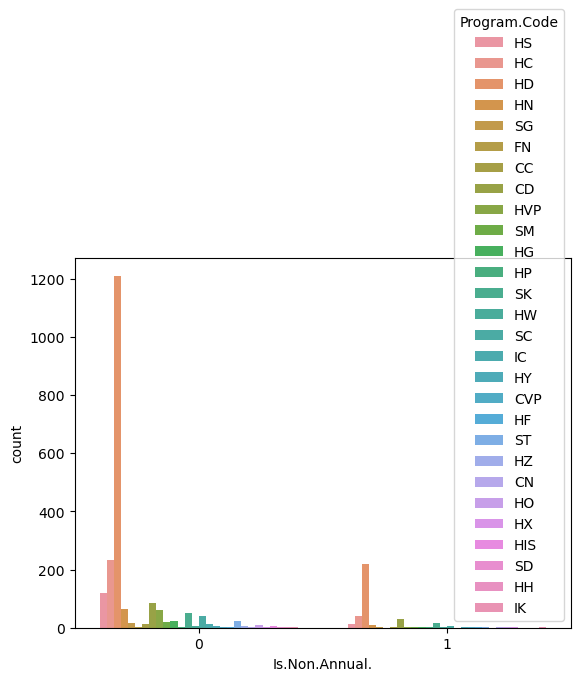

In [3]:
#Is.Non.Annual  wrt program code
sns.countplot(data=data, x="Is.Non.Annual.", hue="Program.Code")

<AxesSubplot:xlabel='Travel.Type', ylabel='count'>

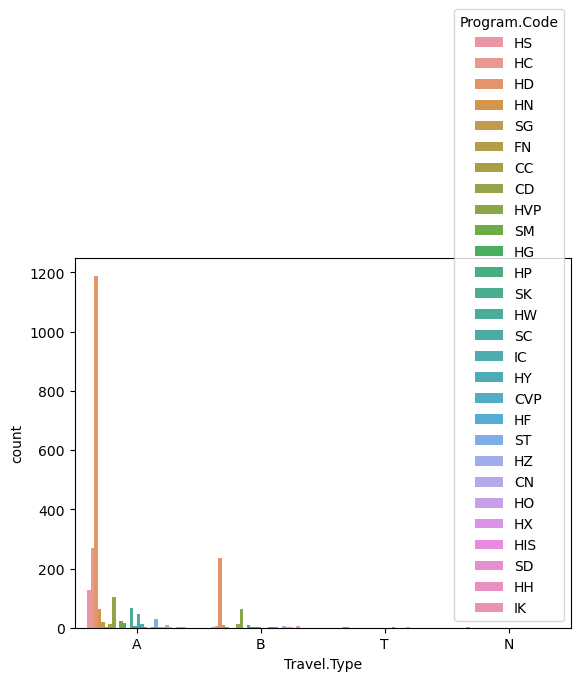

In [4]:
#Travel.Type  wrt program code
sns.countplot(data=data, x="Travel.Type",hue="Program.Code")

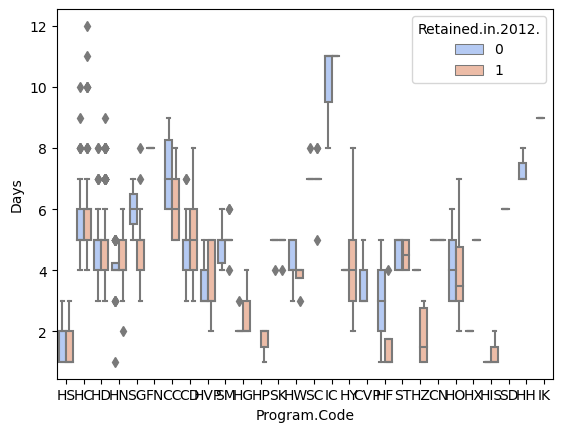

In [5]:
sns.boxplot(x="Program.Code", y="Days", hue="Retained.in.2012.",data=data, palette="coolwarm")
plt.rcParams['figure.figsize'] = (40,10)

<AxesSubplot:xlabel='School.Sponsor', ylabel='count'>

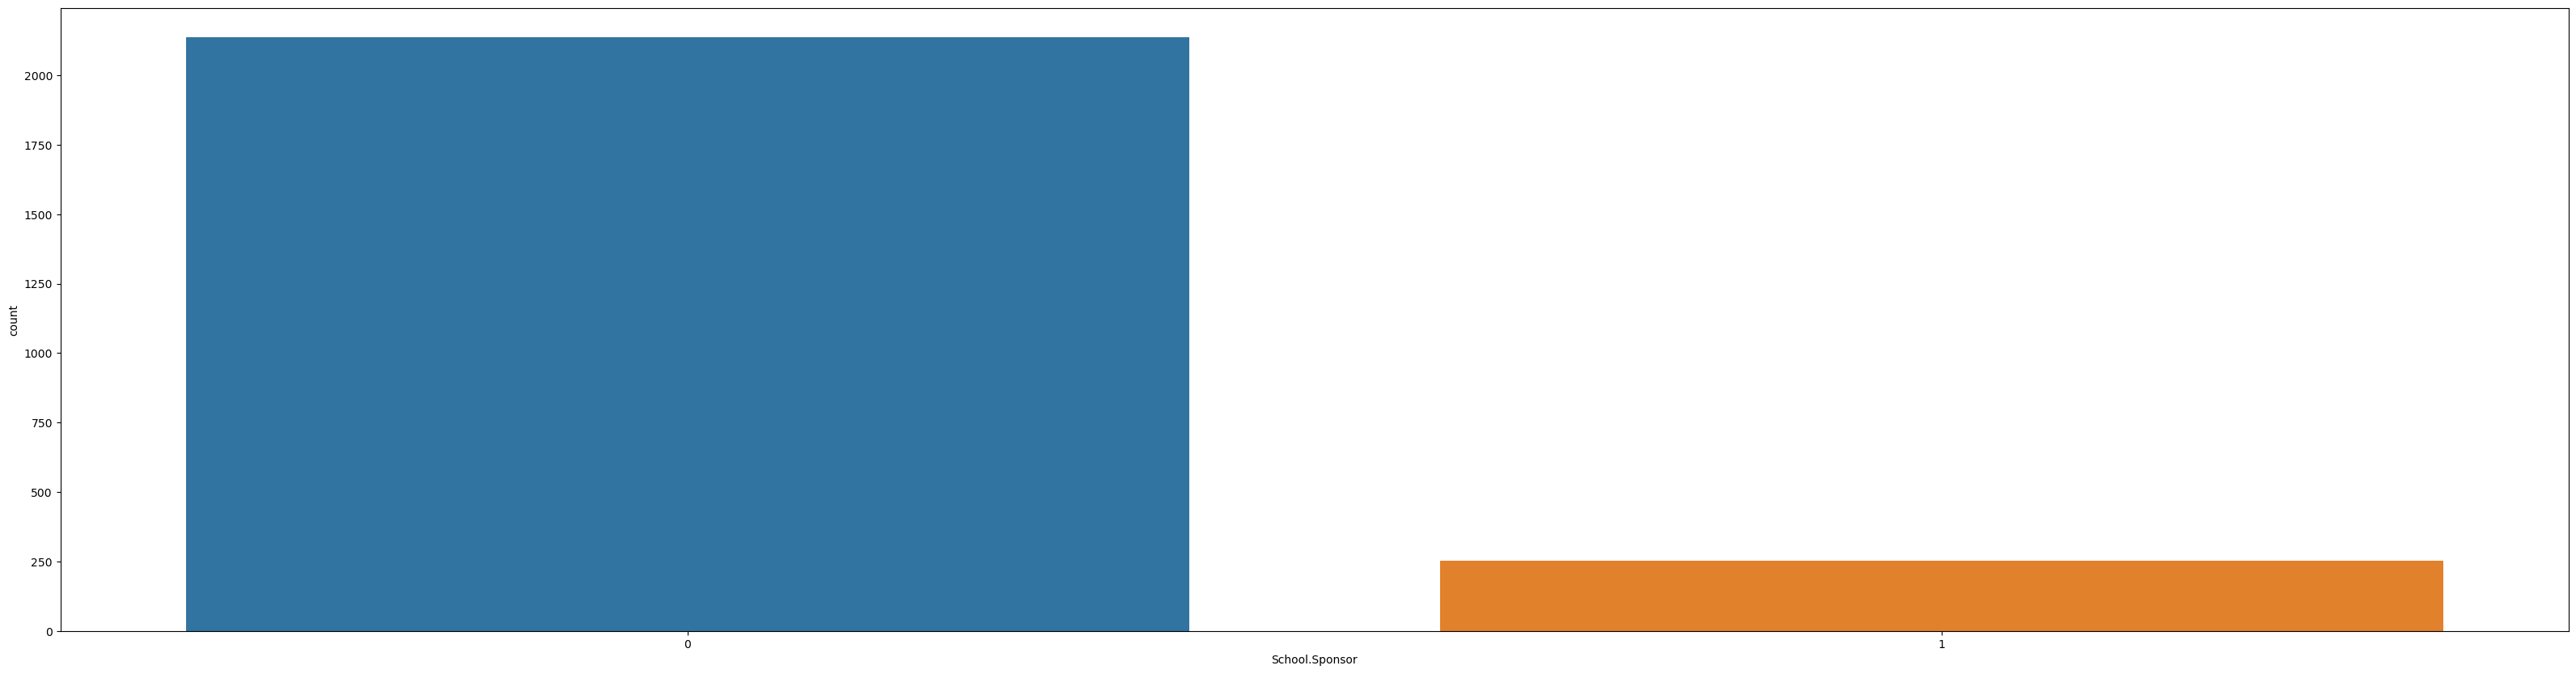

In [39]:
#School.Sponsor  wrt program code
sns.countplot(data=data, x="School.Sponsor")

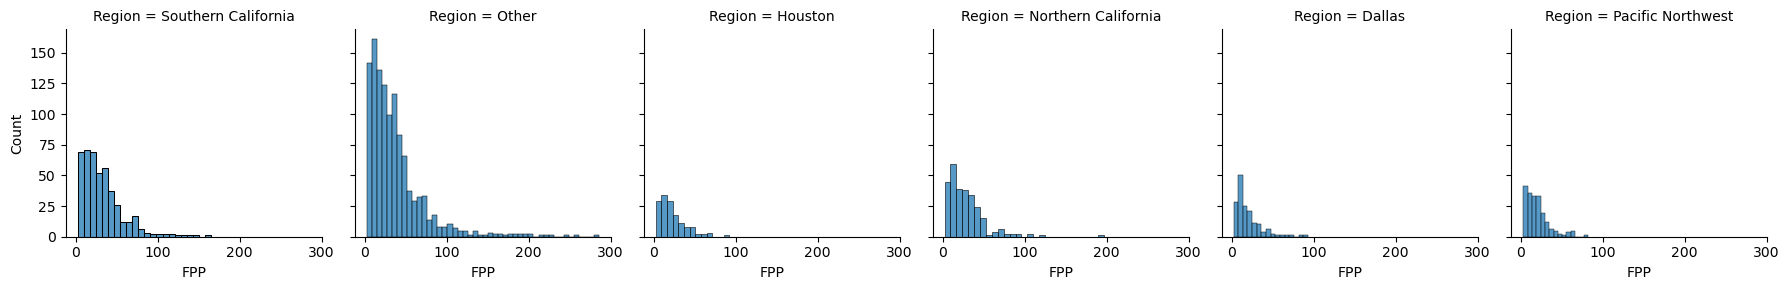

In [7]:
#FPP  wrt Region
g = sns.FacetGrid(data, col="Region")
g.map_dataframe(sns.histplot, x="FPP")

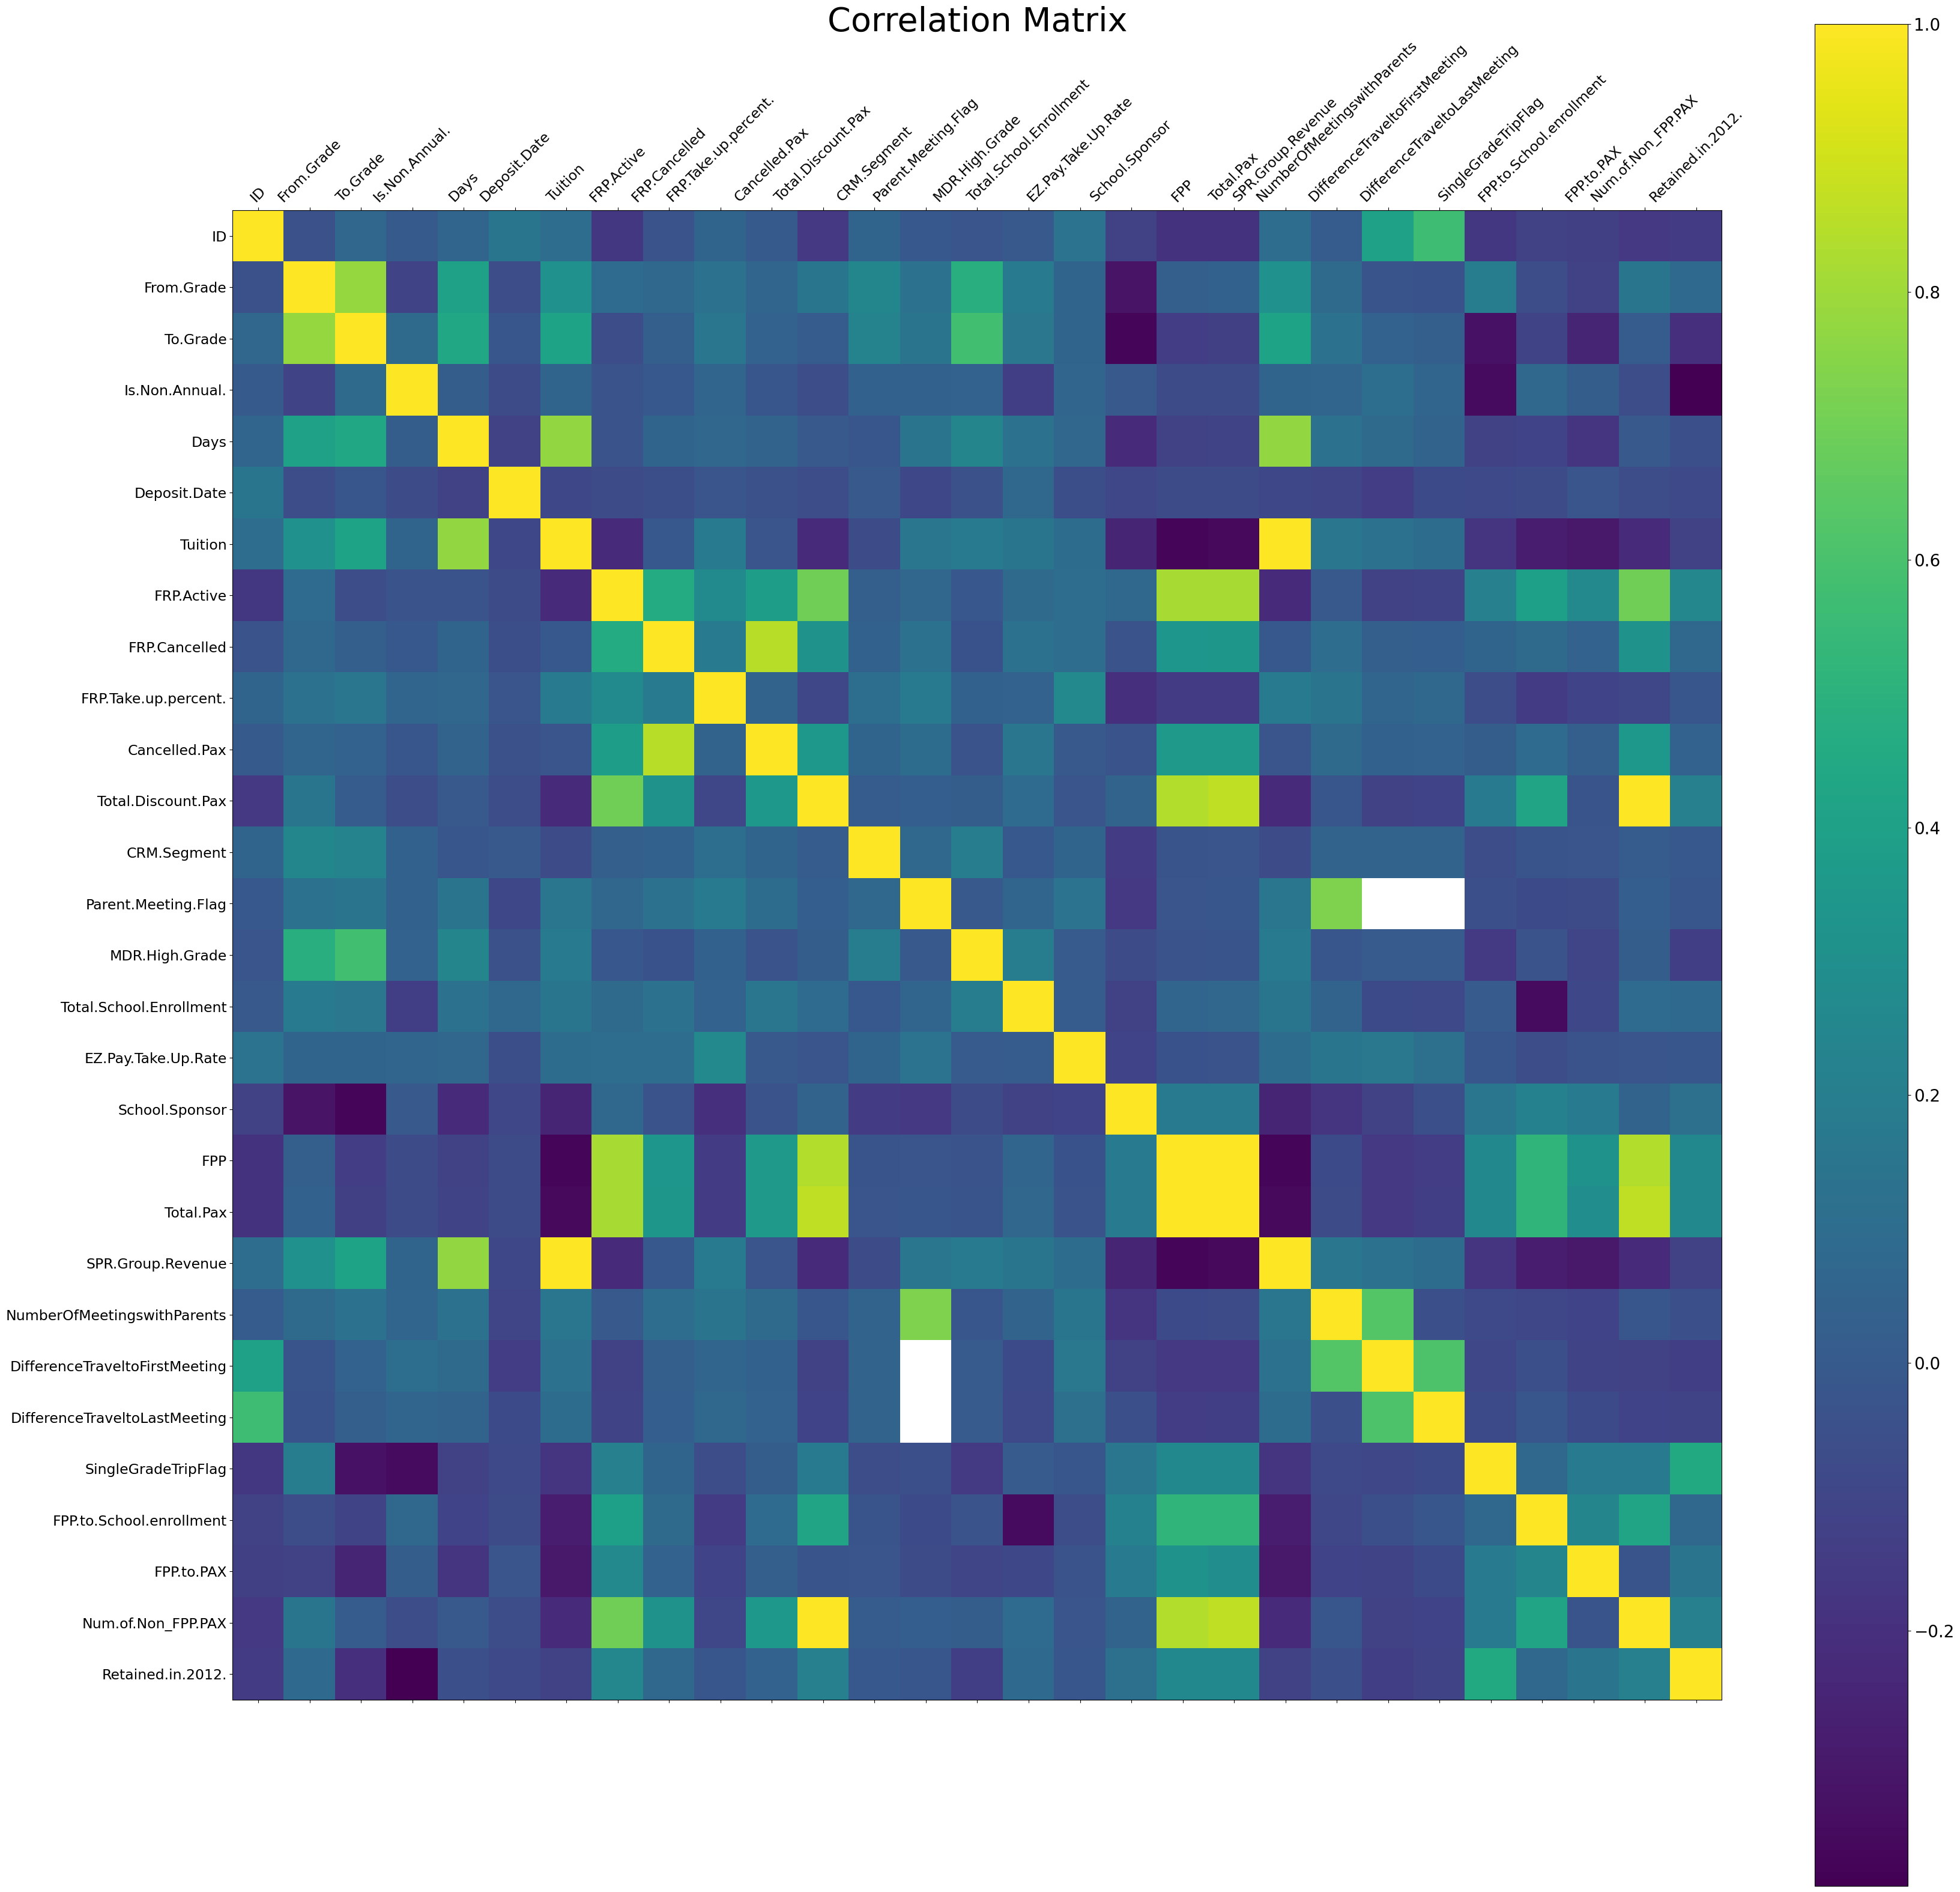

In [8]:
corr_matrix = plt.figure(figsize=(40,40))
plt.matshow(data.corr(), fignum=corr_matrix.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=17, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=17)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Correlation Matrix', fontsize=40);

In [9]:
data.drop(['From.Grade','To.Grade','Departure.Date','Return.Date','FRP.Active','FRP.Cancelled','Early.RPL','Latest.RPL','Cancelled.Pax','Total.Discount.Pax','Initial.System.Date','Program.Code'],axis=1, inplace=True)
data.drop(['Group.State','School.Type','Parent.Meeting.Flag','MDR.Low.Grade','MDR.High.Grade','Total.School.Enrollment','EZ.Pay.Take.Up.Rate','SPR.Product.Type','Total.Pax','SPR.Group.Revenue','Num.of.Non_FPP.PAX'],axis=1, inplace=True)
data.drop(['FirstMeeting','LastMeeting','DifferenceTraveltoFirstMeeting','DifferenceTraveltoLastMeeting','SchoolGradeTypeLow','SchoolGradeTypeHigh','GroupGradeTypeLow','GroupGradeTypeHigh','SingleGradeTripFlag','FPP.to.PAX'],axis=1, inplace=True)
data.drop(['SchoolSizeIndicator','FPP.to.School.enrollment','Poverty.Code'],axis=1, inplace=True)
data.reindex()
print(data.shape)

(2389, 20)


In [10]:
print(data.isnull().sum())

ID                              0
Is.Non.Annual.                  0
Days                            0
Travel.Type                     0
Deposit.Date                    0
Special.Pay                     2
Tuition                         0
FRP.Take.up.percent.            0
Region                          0
CRM.Segment                     4
Income.Level                   62
School.Sponsor                  0
SPR.New.Existing                0
FPP                             0
NumberOfMeetingswithParents     0
SchoolGradeType                 0
DepartureMonth                  0
GroupGradeType                  0
MajorProgramCode                0
Retained.in.2012.               0
dtype: int64


In [11]:
data['Special.Pay'] = data['Special.Pay'].fillna(method = 'ffill')
data['Income.Level'] = data['Income.Level'].fillna(method = 'ffill')
data['CRM.Segment'] = data['CRM.Segment'].fillna(data['CRM.Segment'].mean())


In [12]:
data.info()
print(data.isnull().sum())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2389 non-null   int64  
 1   Is.Non.Annual.               2389 non-null   int64  
 2   Days                         2389 non-null   int64  
 3   Travel.Type                  2389 non-null   object 
 4   Deposit.Date                 2389 non-null   int64  
 5   Special.Pay                  2389 non-null   object 
 6   Tuition                      2389 non-null   int64  
 7   FRP.Take.up.percent.         2389 non-null   float64
 8   Region                       2389 non-null   object 
 9   CRM.Segment                  2389 non-null   float64
 10  Income.Level                 2389 non-null   object 
 11  School.Sponsor               2389 non-null   int64  
 12  SPR.New.Existing             2389 non-null   object 
 13  FPP               

,ID,Is.Non.Annual.,Days,Travel.Type,Deposit.Date,Special.Pay,Tuition,FRP.Take.up.percent.,Region,CRM.Segment,Income.Level,School.Sponsor,SPR.New.Existing,FPP,NumberOfMeetingswithParents,SchoolGradeType,DepartureMonth,GroupGradeType,MajorProgramCode,Retained.in.2012.
0,1,0,1,A,40420,XYZ,424,0.424,Southern California,4.000000,Q,1,EXISTING,59,1,Elementary->Elementary,January,K->Elementary,H,1
1,2,0,7,A,40132,CP,2350,0.409,Other,10.000000,A,0,EXISTING,22,2,Middle->Middle,January,Middle->Middle,H,1
2,3,0,3,A,40466,XYZ,1181,0.708,Other,10.000000,O,0,EXISTING,24,1,Middle->Middle,January,Middle->Middle,H,1
3,4,1,3,B,40550,XYZ,376,0.000,Other,7.000000,O,0,EXISTING,18,0,High->High,January,Undefined->Undefined,H,0
4,5,0,6,T,40451,XYZ,865,0.494,Other,10.000000,C,0,EXISTING,81,1,Middle->Middle,January,Middle->Middle,H,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,2385,0,5,A,40527,XYZ,1892,0.514,Southern California,10.000000,D,0,EXISTING,35,0,Middle->Middle,June,Middle->Middle,H,0
2385,2386,0,5,A,40466,FR,1699,0.800,Southern California,4.000000,Q,0,EXISTING,20,2,Middle->Middle,June,K->Middle,H,1
2386,2387,0,6,A,40561,SA,2149,0.000,Northern California,7.000000,Q,0,NEW,30,0,High->High,June,Undefined->Undefined,H,1
2387,2388,0,1,A,40529,XYZ,449,0.188,Southern California,6.920335,Q,0,NEW,16,1,Elementary->Elementary,June,Undefined->Undefined,H,1


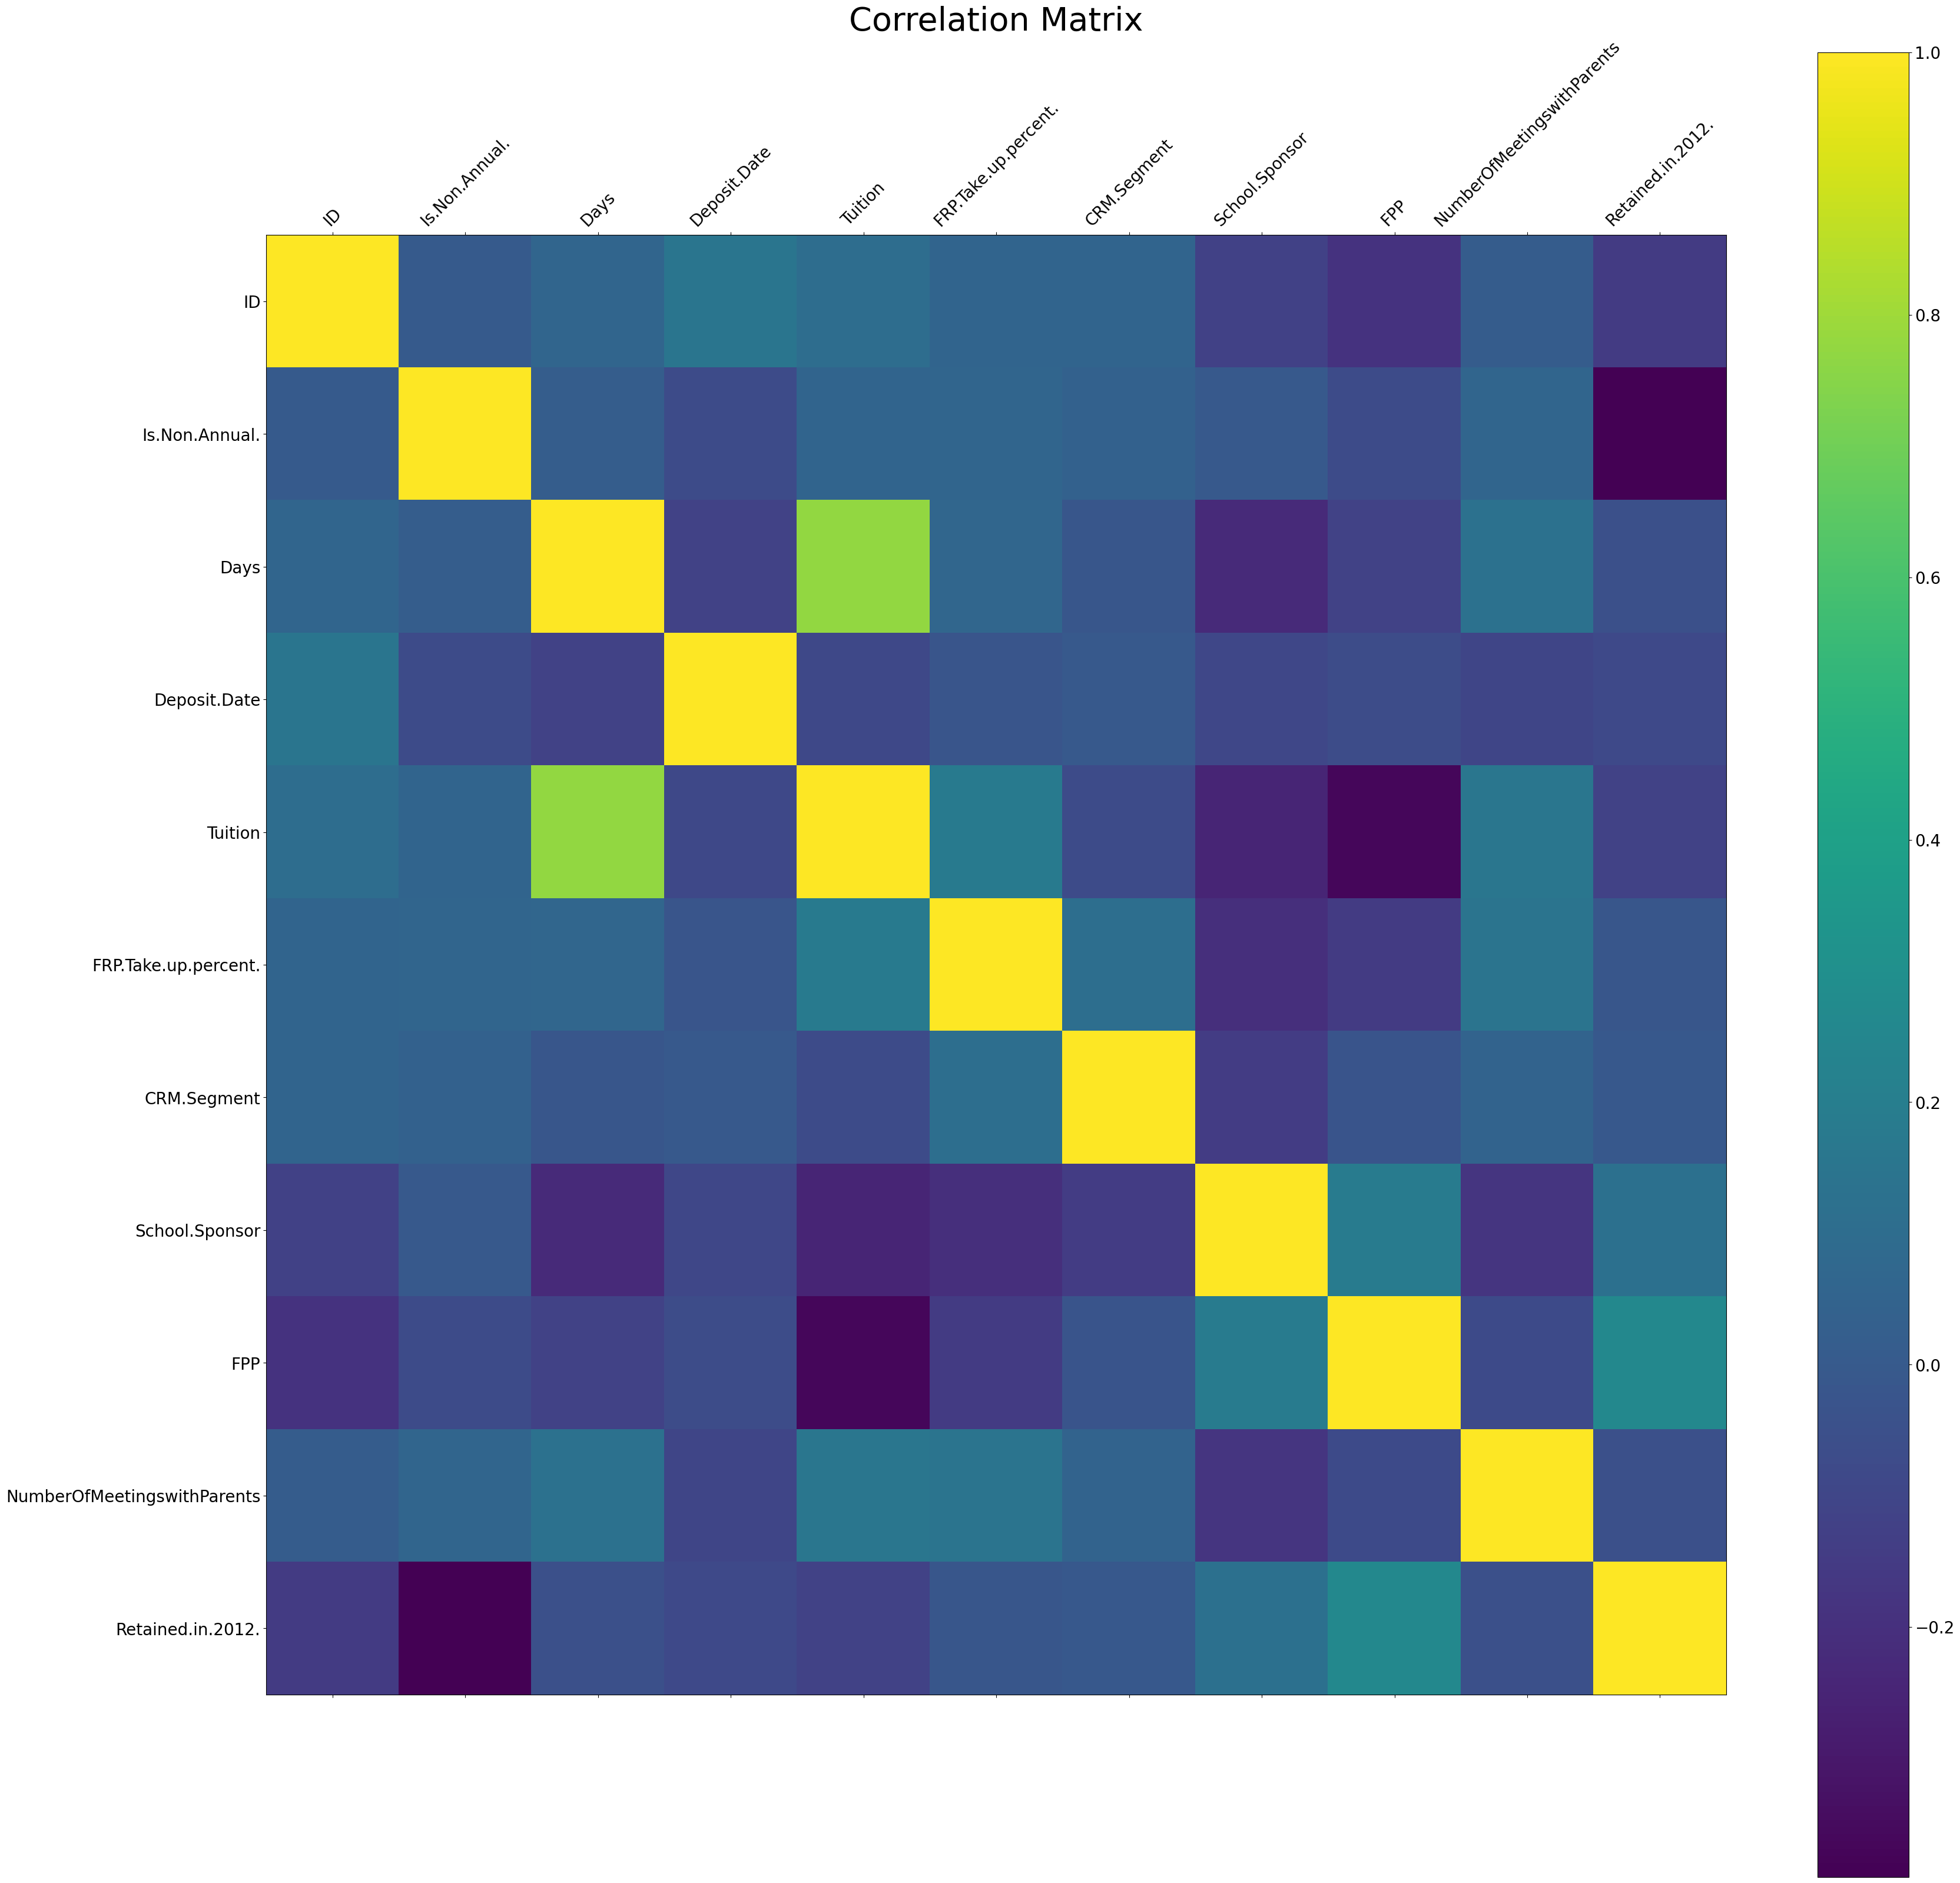

In [13]:
new_corr_matrix = plt.figure(figsize=(40,40))
plt.matshow(data.corr(), fignum=new_corr_matrix.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=20, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Correlation Matrix', fontsize=40);

In [14]:
#Encoding Data 
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


Y = data['Retained.in.2012.']
data.drop('Retained.in.2012.',axis=1, inplace = True)

#Ordinal Encoding
Ordinal_Encoding_Data = data[['Income.Level','SchoolGradeType','DepartureMonth','GroupGradeType']]

Ordinal_Encoder = OrdinalEncoder()
Final_Encoded_Data = Ordinal_Encoder.fit_transform(Ordinal_Encoding_Data) 
data[Ordinal_Encoding_Data.columns] = Final_Encoded_Data


#One-Hot Encoding
# One hot Encoder
One_Hot_Encoding_Data = ['MajorProgramCode','Region','Travel.Type','Special.Pay','SPR.New.Existing']
One_Hot_encoder = OneHotEncoder()
Encoded_Columns = One_Hot_encoder.fit_transform(data[One_Hot_Encoding_Data]).toarray()
Feature_Names = One_Hot_encoder.get_feature_names_out(One_Hot_Encoding_Data)
#Data frame for new columns created
Encoded_Data_OneHot = pd.DataFrame(Encoded_Columns, columns = Feature_Names)

#Dropping Existing ones
data.drop(One_Hot_Encoding_Data,axis=1, inplace= True)

#Use the below data for regrssion
FinalData= data.copy()
FinalData = pd.concat([FinalData, Encoded_Data_OneHot], axis = 1)
data = FinalData.copy()
FinalData.drop(['ID'], axis= 1 , inplace= True)
FinalData.head()

,Is.Non.Annual.,Days,Deposit.Date,Tuition,FRP.Take.up.percent.,CRM.Segment,Income.Level,School.Sponsor,FPP,NumberOfMeetingswithParents,...,Travel.Type_A,Travel.Type_B,Travel.Type_N,Travel.Type_T,Special.Pay_CP,Special.Pay_FR,Special.Pay_SA,Special.Pay_XYZ,SPR.New.Existing_EXISTING,SPR.New.Existing_NEW
0,0,1,40420,424,0.424,4.0,20.0,1,59,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,7,40132,2350,0.409,10.0,0.0,0,22,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,3,40466,1181,0.708,10.0,14.0,0,24,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1,3,40550,376,0.000,7.0,14.0,0,18,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0,6,40451,865,0.494,10.0,2.0,0,81,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [15]:
#Splitting Train and Test Data
from sklearn.preprocessing import MinMaxScaler
Min_Max_Scaler = MinMaxScaler()
Scaled_FinalData = Min_Max_Scaler.fit_transform(FinalData)
Scaled_FinalData = pd.DataFrame(Scaled_FinalData,columns= FinalData.columns)


#Splitting Data into Test and Train
X_train, X_test, y_train, y_test = train_test_split(Scaled_FinalData, Y, test_size = 0.3, train_size = 0.7,random_state= 1)

Scaled_FinalData.head()


,Is.Non.Annual.,Days,Deposit.Date,Tuition,FRP.Take.up.percent.,CRM.Segment,Income.Level,School.Sponsor,FPP,NumberOfMeetingswithParents,...,Travel.Type_A,Travel.Type_B,Travel.Type_N,Travel.Type_T,Special.Pay_CP,Special.Pay_FR,Special.Pay_SA,Special.Pay_XYZ,SPR.New.Existing_EXISTING,SPR.New.Existing_NEW
0,0.0,0.000000,0.443137,0.083718,0.424,0.3,0.952381,1.0,0.200704,0.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.545455,0.066667,0.551080,0.409,0.9,0.000000,0.0,0.070423,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.181818,0.503268,0.267411,0.708,0.9,0.666667,0.0,0.077465,0.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.181818,0.613072,0.072070,0.000,0.6,0.666667,0.0,0.056338,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.454545,0.483660,0.190730,0.494,0.9,0.095238,0.0,0.278169,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


              precision    recall  f1-score   support

           0       0.75      0.69      0.72       292
           1       0.80      0.84      0.82       425

    accuracy                           0.78       717
   macro avg       0.77      0.76      0.77       717
weighted avg       0.78      0.78      0.78       717

Accuracy: 77.82
Precision: 79.69
Recall: 84.0
Training Set Accuracy:  78.83
Test Set Accuracy:  77.82


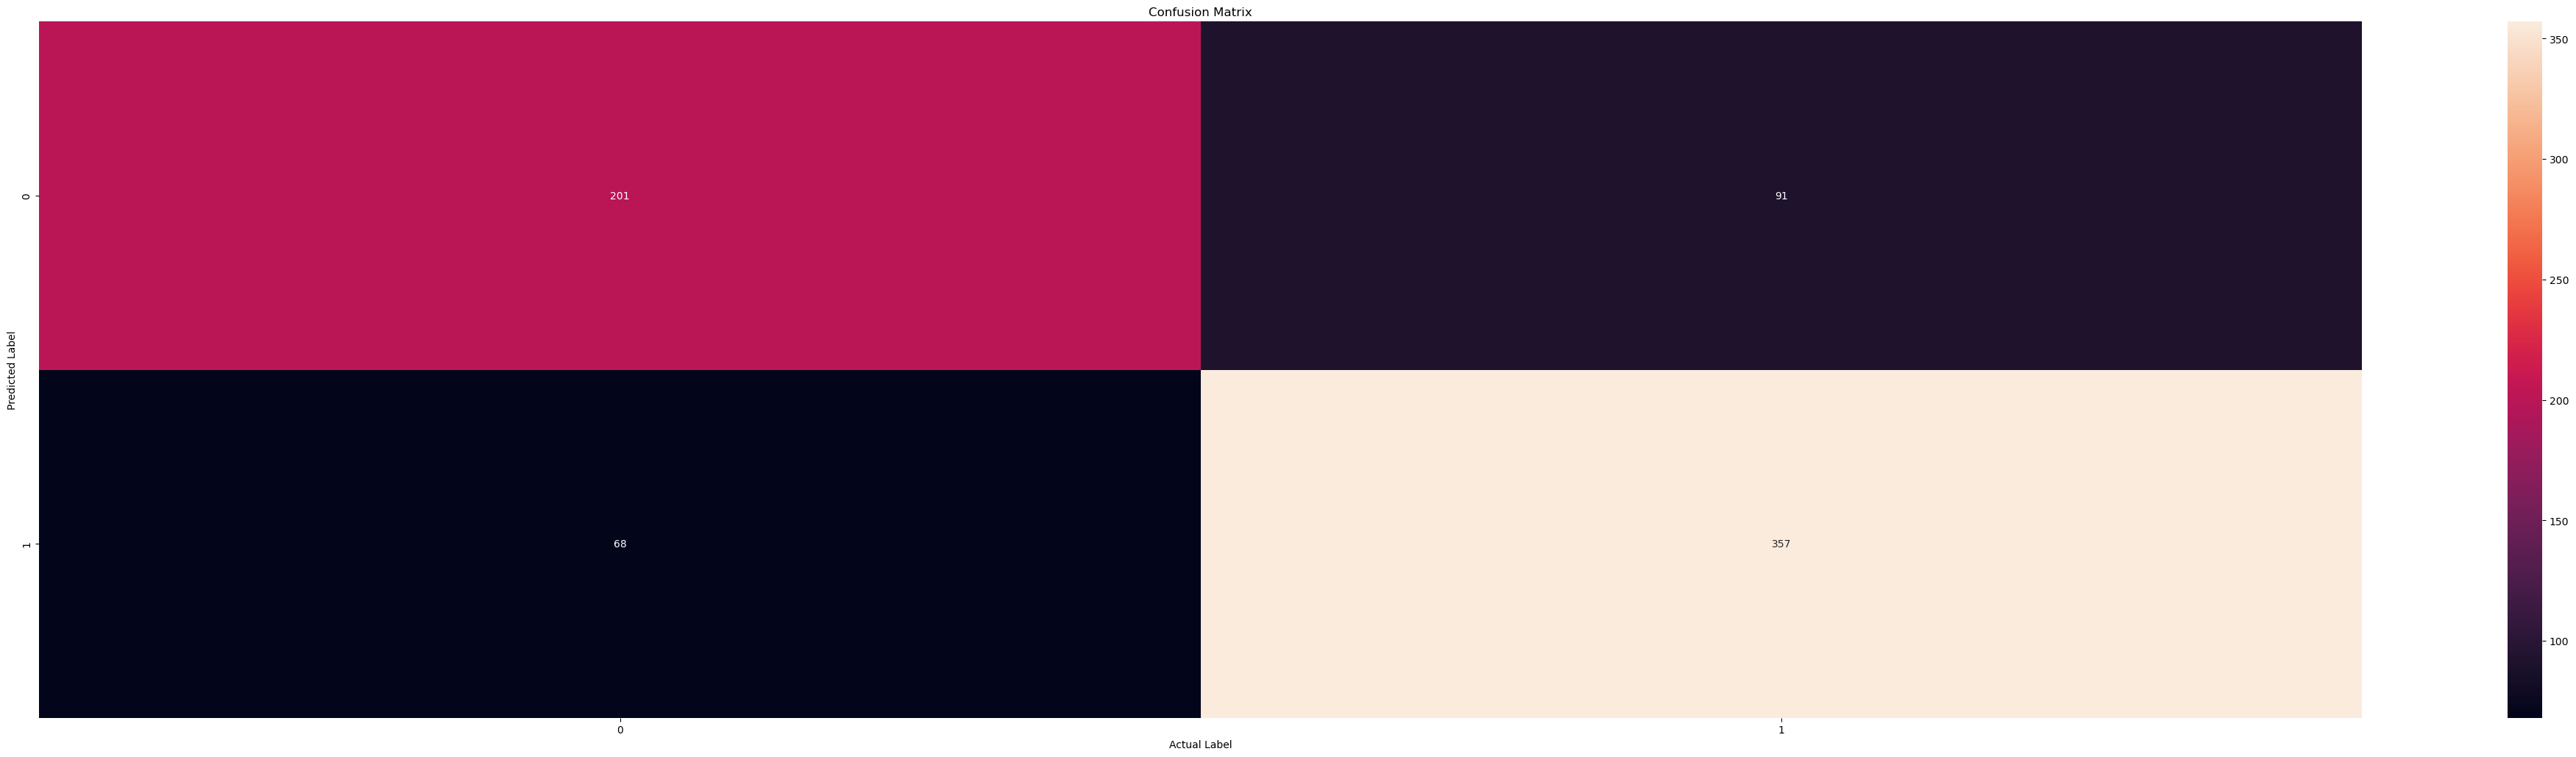

In [16]:
#Logistics Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))

#Defining confusion matrix using metrics
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

#Importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Confusion Matrix Plotting
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap Creation
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion Matrix', y=1)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

#Accuracy results from metrics report
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100, 2))
print("Precision:",round(metrics.precision_score(y_test, y_pred)*100, 2))
print("Recall:",round(metrics.recall_score(y_test, y_pred)*100, 2))

#Accuracy results from Logistics Regression
print('Training Set Accuracy: ', round(logreg.score(X_train, y_train) * 100, 2))
print('Test Set Accuracy: ', round(logreg.score(X_test, y_test)*100, 2))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       292
           1       0.83      0.78      0.80       425

    accuracy                           0.77       717
   macro avg       0.77      0.77      0.77       717
weighted avg       0.78      0.77      0.78       717

Accuracy: 77.41
Precision: 82.63
Recall: 78.35
Training Set accuracy:  77.63
Test Set accuracy:  77.41


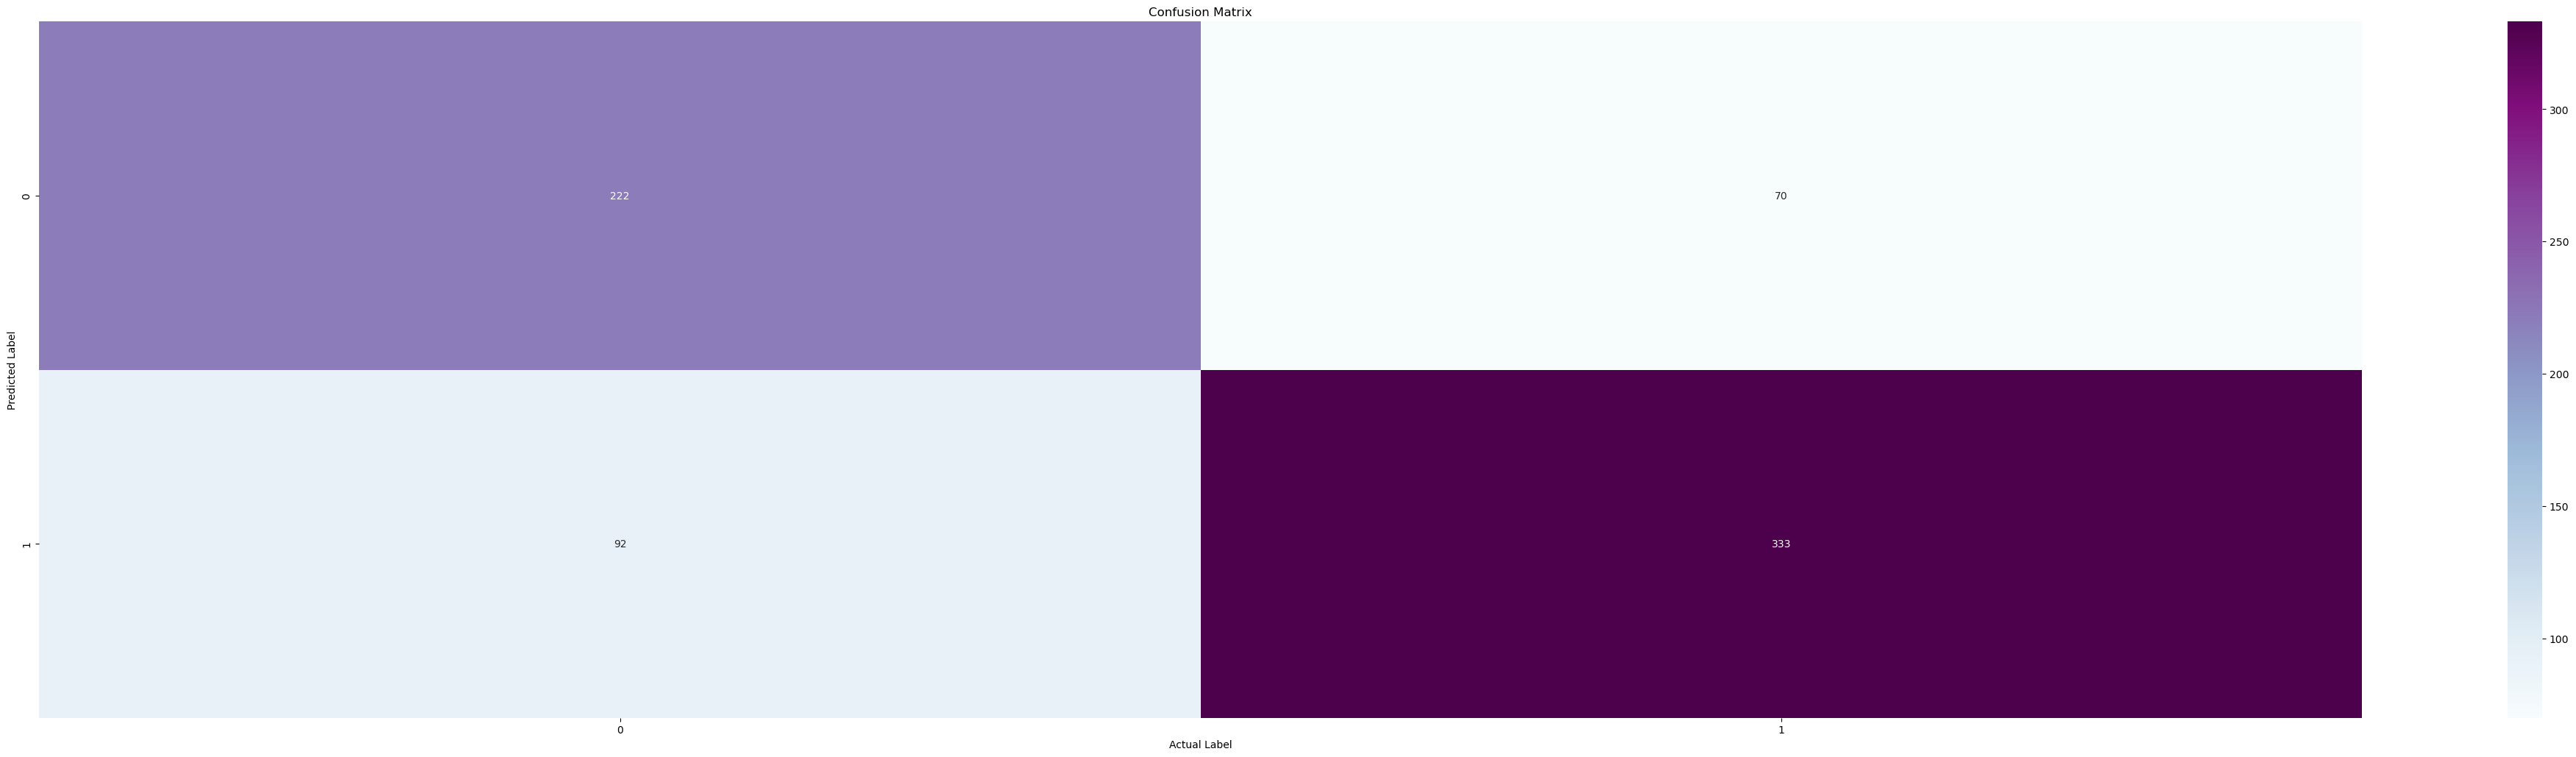

In [17]:
#SVM - Linear SVM
from sklearn.svm import SVC
linear_svm = SVC(kernel='linear') #Defining the type of SVM
linear_svm.fit(X_train, y_train)
y_pred = linear_svm.predict(X_test)
print(classification_report(y_test,y_pred))

#Defining confusion matrix using metrics
cnf_matrix_linear = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix_linear

#Confusion Matrix Plotting
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap Creation
sns.heatmap(pd.DataFrame(cnf_matrix_linear), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion Matrix', y=1)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

#Accuracy results from metrics report
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100, 2))
print("Precision:",round(metrics.precision_score(y_test, y_pred)*100, 2))
print("Recall:",round(metrics.recall_score(y_test, y_pred)*100, 2))

#Accuracy results from Linear SVM Regression
print('Training Set accuracy: ', round(linear_svm.score(X_train, y_train) * 100, 2))
print('Test Set accuracy: ', round(linear_svm.score(X_test, y_test)*100, 2))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       292
           1       0.81      0.82      0.82       425

    accuracy                           0.78       717
   macro avg       0.77      0.77      0.77       717
weighted avg       0.78      0.78      0.78       717

Accuracy: 77.96
Precision: 80.83
Recall: 82.35
training set accuracy:  78.53
test set accuracy:  77.96


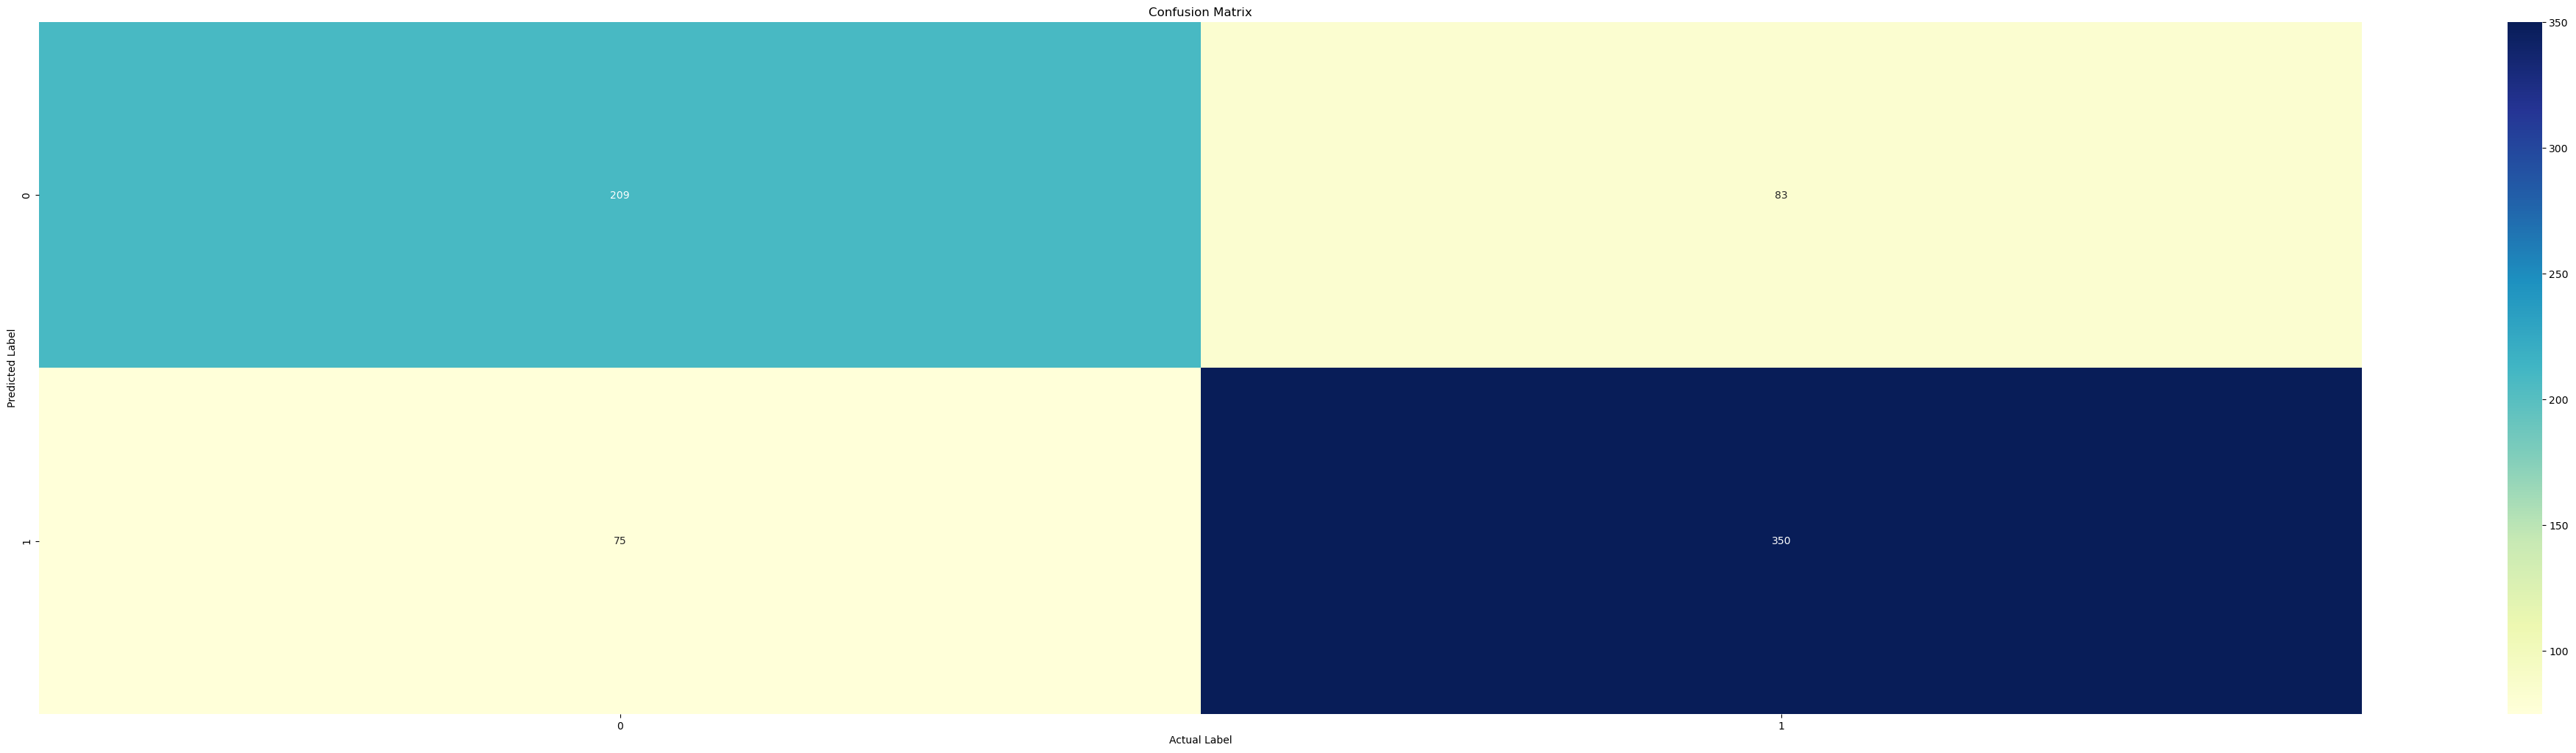

In [18]:
#SVM - Gaussian SVM
gaussian_svm = SVC(kernel='rbf') #Defining the type of SVM
gaussian_svm.fit(X_train, y_train)
y_pred = gaussian_svm.predict(X_test)
print(classification_report(y_test,y_pred))

#Defining confusion matrix using metrics
cnf_matrix_gaussian = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix_gaussian

#Confusion Matrix Plotting
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap Creation
sns.heatmap(pd.DataFrame(cnf_matrix_gaussian), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion Matrix', y=1)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

#Accuracy results from metrics report
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100, 2))
print("Precision:",round(metrics.precision_score(y_test, y_pred)*100, 2))
print("Recall:",round(metrics.recall_score(y_test, y_pred)*100, 2))

#Accuracy results from Gaussian SVM Regression
print('training set accuracy: ', round(gaussian_svm.score(X_train, y_train) * 100, 2))
print('test set accuracy: ', round(gaussian_svm.score(X_test, y_test)*100, 2))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       292
           1       0.80      0.84      0.82       425

    accuracy                           0.78       717
   macro avg       0.78      0.77      0.77       717
weighted avg       0.78      0.78      0.78       717

Accuracy: 78.24
Precision: 79.96
Recall: 84.47
Training Set Accuracy:  81.22
Test Set Accuracy:  78.24


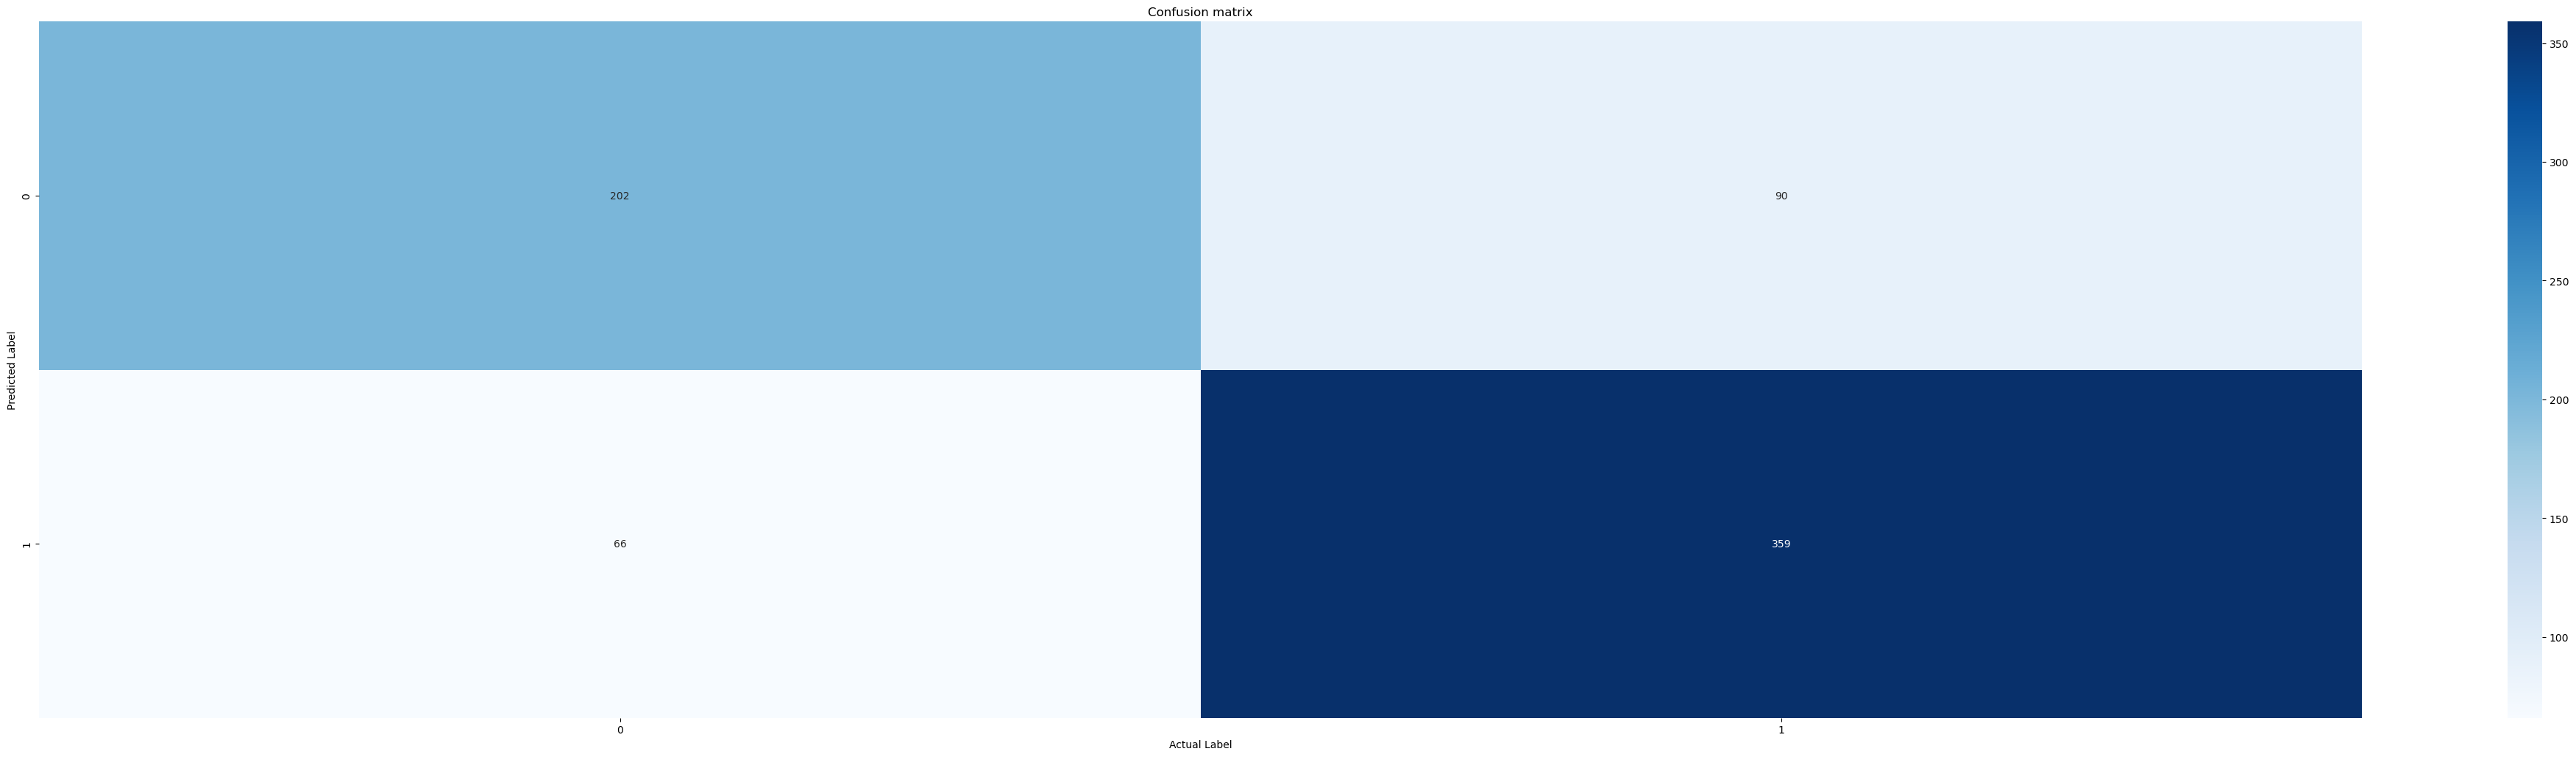

In [19]:
#SVM - Polynomial SVM
polynomial_svm = SVC(kernel='poly', degree=3)
polynomial_svm.fit(X_train, y_train)
y_pred = polynomial_svm.predict(X_test)
print(classification_report(y_test,y_pred))

#Defining confusion matrix using metrics
cnf_matrix_polynomial = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix_polynomial

#Confusion Matrix Plotting
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


#Heatmap Creation
sns.heatmap(pd.DataFrame(cnf_matrix_polynomial), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

#Accuracy results from metrics report
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100, 2))
print("Precision:",round(metrics.precision_score(y_test, y_pred)*100, 2))
print("Recall:",round(metrics.recall_score(y_test, y_pred)*100, 2))

#Accuracy results from Polynomial SVM Regression
print('Training Set Accuracy: ', round(polynomial_svm.score(X_train, y_train) * 100, 2))
print('Test Set Accuracy: ', round(polynomial_svm.score(X_test, y_test)*100, 2))

D:\Phyt\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


              precision    recall  f1-score   support

           0       0.73      0.71      0.72       292
           1       0.80      0.82      0.81       425

    accuracy                           0.77       717
   macro avg       0.77      0.76      0.76       717
weighted avg       0.77      0.77      0.77       717

Accuracy: 77.41
Precision: 80.23
Recall: 82.12
Training Set Accuracy:  80.92
Test Set Accuracy:  77.41


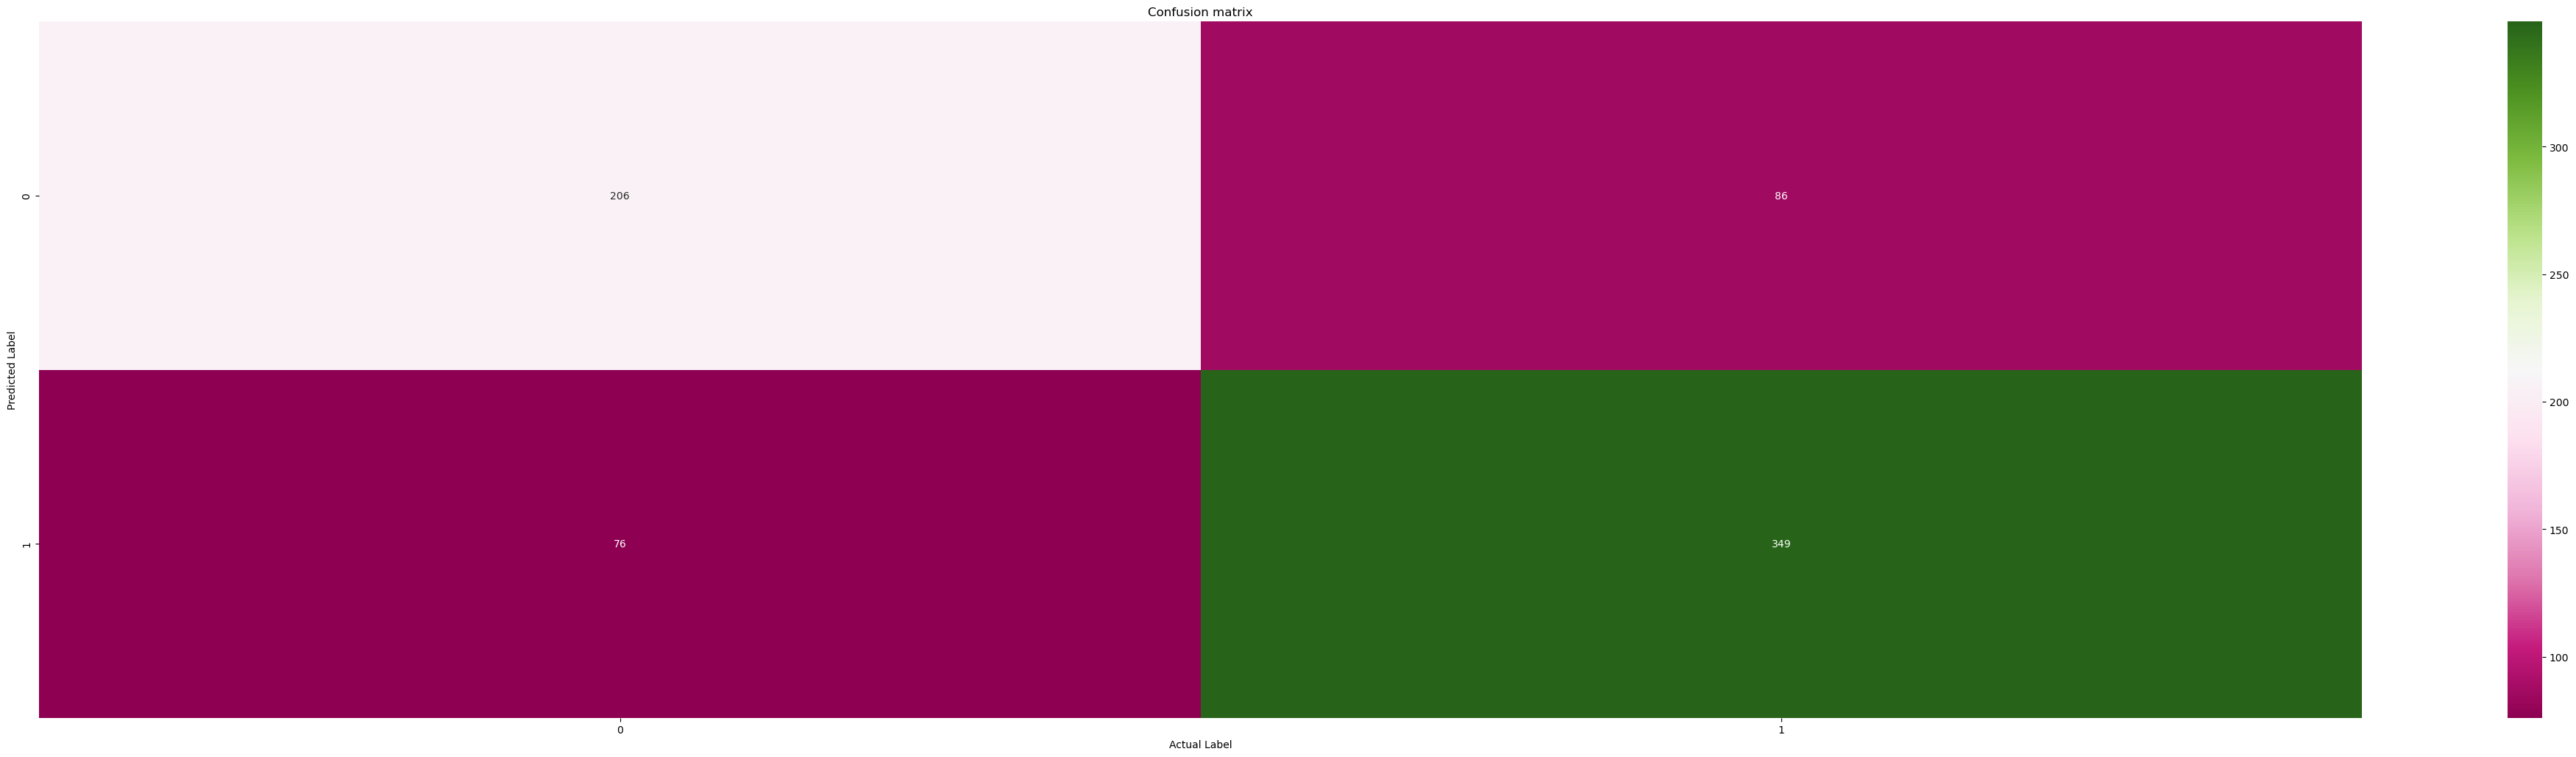

In [20]:
#Neural Networks
from sklearn.neural_network import MLPClassifier
neural_networks = MLPClassifier(solver='lbfgs', alpha=0.0001,hidden_layer_sizes=(7,5), random_state=1)
neural_networks.fit(X_train, y_train)
y_pred = neural_networks.predict(X_test)
print(classification_report(y_test,y_pred))

#Defining confusion matrix using metrics
cnf_matrix_nn = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix_nn

#Confusion Matrix Plotting
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Heatmap Creation
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="PiYG" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

#Accuracy results from metrics report
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2)) 
print("Precision:",round(metrics.precision_score(y_test, y_pred)*100,2))
print("Recall:",round(metrics.recall_score(y_test, y_pred)*100,2))

#Accuracy results from Neural Networks
print('Training Set Accuracy: ', round(neural_networks.score(X_train, y_train) * 100, 2))
print('Test Set Accuracy: ', round(neural_networks.score(X_test, y_test)*100, 2))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       292
           1       0.77      0.83      0.80       425

    accuracy                           0.75       717
   macro avg       0.74      0.73      0.74       717
weighted avg       0.75      0.75      0.75       717

Accuracy: 75.17
Precision: 77.02
Recall: 82.82
Training Set Accuracy is:  79.9
Test Set Accuracy is:  75.17


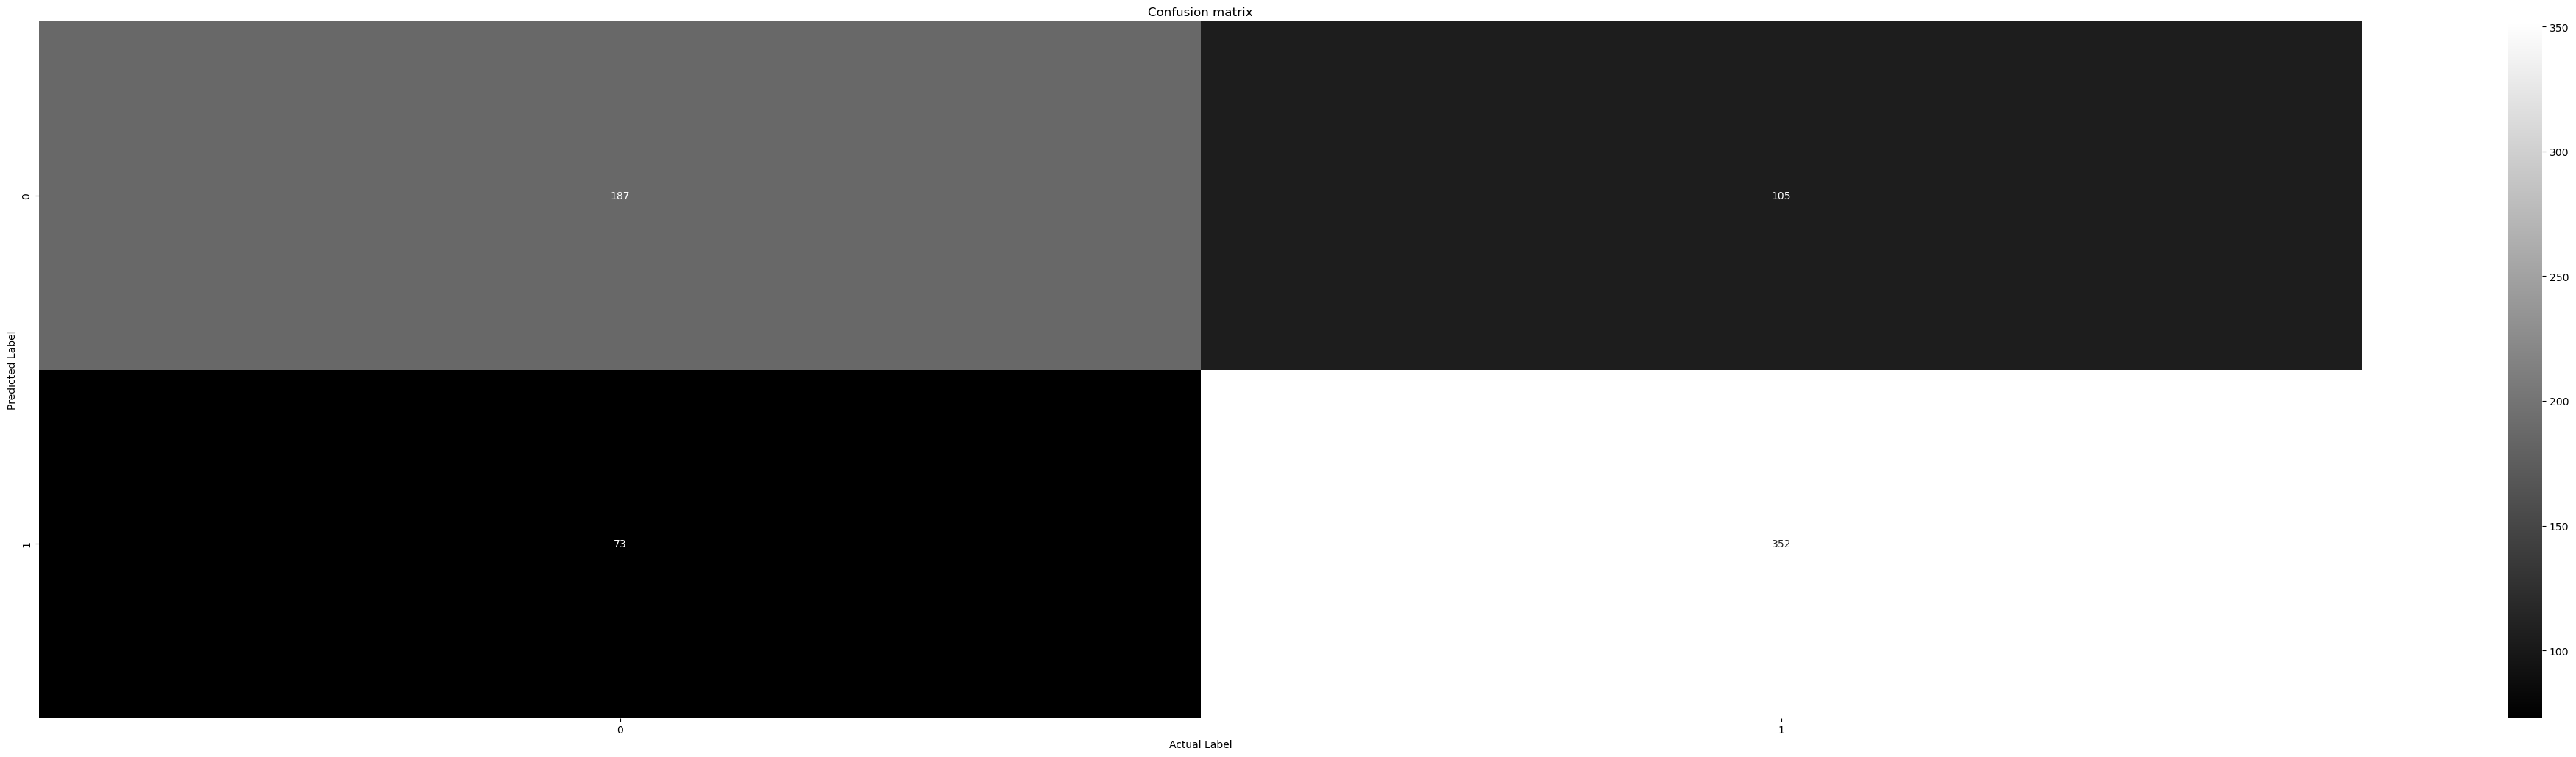

In [21]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform')
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print(metrics.classification_report(y_test, knn_predictions))


#Defining confusion matrix using metrics
cnf_matrix_knn= metrics.confusion_matrix(y_test, knn_predictions)
cnf_matrix_knn

#Confusion Matrix plotting
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Heatmap Creation
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True , cmap='gray', fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

#Accuracy results form metrics report
print("Accuracy:",round(metrics.accuracy_score(y_test, knn_predictions)*100,2)) 
print("Precision:",round(metrics.precision_score(y_test, knn_predictions)*100,2))
print("Recall:",round(metrics.recall_score(y_test, knn_predictions)*100,2))

#Accuracy results from KNN
print('Training Set Accuracy is: ', round(knn.score(X_train, y_train)*100, 2))
print('Test Set Accuracy is: ', round(knn.score(X_test, y_test)*100, 2))

              precision    recall  f1-score   support

           0       0.67      0.52      0.59       292
           1       0.72      0.82      0.76       425

    accuracy                           0.70       717
   macro avg       0.69      0.67      0.68       717
weighted avg       0.70      0.70      0.69       717

Accuracy: 70.01
Precision: 71.52
Recall: 82.12
Training Set Accuracy:  70.93
Test Set Accuracy:  70.01


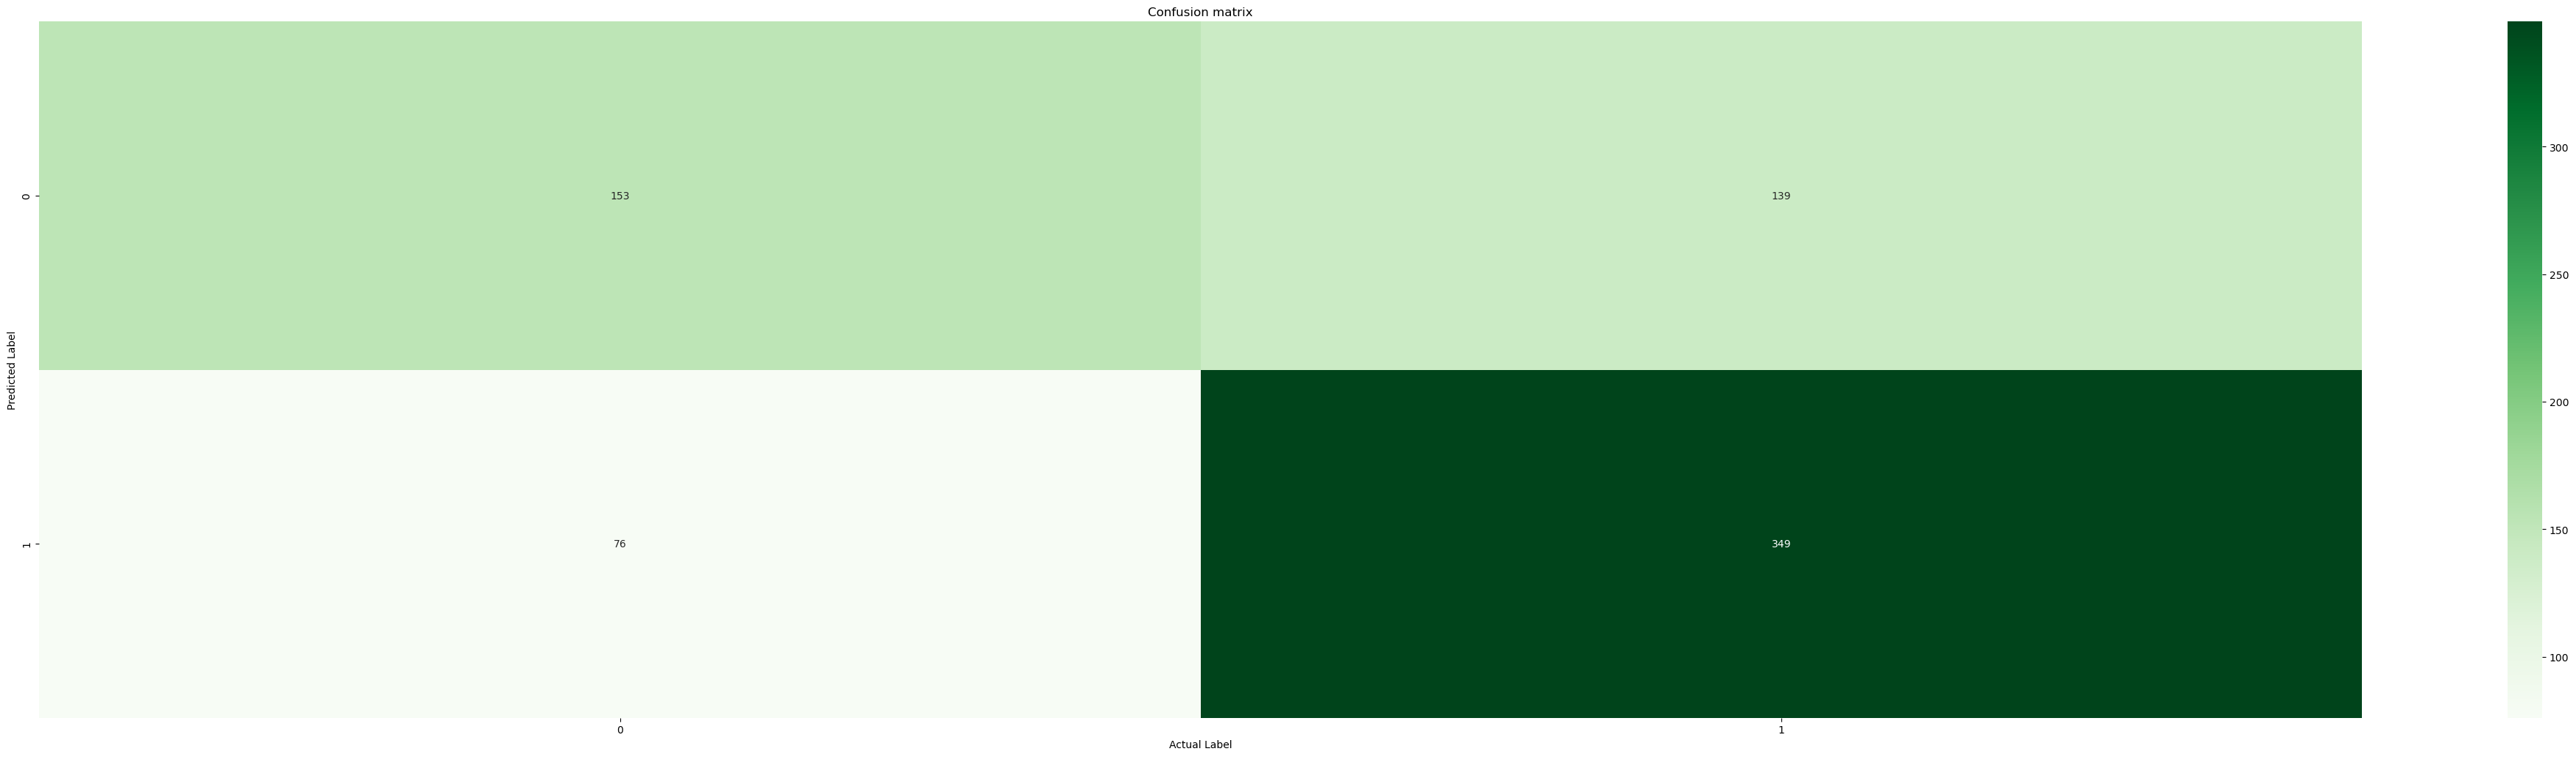

In [22]:
#SVM - Sigmoid SVM
sigmoid_svm = SVC(kernel='sigmoid')
sigmoid_svm.fit(X_train, y_train)
y_pred = sigmoid_svm.predict(X_test)
print(classification_report(y_test,y_pred))

#Defining confusion matrix using metrics
cnf_matrix_sigmoid = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix_sigmoid

#Confusion Matrix Plotting
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap Creation
sns.heatmap(pd.DataFrame(cnf_matrix_sigmoid), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

#Accuracy results from metrics report
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100, 2))
print("Precision:",round(metrics.precision_score(y_test, y_pred)*100, 2))
print("Recall:",round(metrics.recall_score(y_test, y_pred)*100, 2))

#Accuracy results from Sigmoid SVM Regression 
print('Training Set Accuracy: ', round(sigmoid_svm.score(X_train, y_train) * 100, 2))
print('Test Set Accuracy: ', round(sigmoid_svm.score(X_test, y_test)*100, 2))

In [23]:
# Decision Tree
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
print(dt_model.feature_importances_)
print(X_train.columns)
print('Tree depth: ', dt_model.get_depth())
print('Number of leaf nodes: ', dt_model.get_n_leaves())
print('training set accuracy: ', round(dt_model.score(X_train, y_train) * 100, 2))

[0.16407566 0.01873296 0.04914587 0.12975984 0.09468304 0.01852559
 0.07225973 0.00294309 0.10663251 0.01705331 0.02365058 0.02698672
 0.03309331 0.00531734 0.00357375 0.         0.00347982 0.01664641
 0.00397978 0.01214991 0.00252265 0.0068901  0.00644847 0.00642557
 0.00262353 0.         0.00114883 0.00216227 0.00445634 0.00315331
 0.01130454 0.15017517 0.        ]
Index(['Is.Non.Annual.', 'Days', 'Deposit.Date', 'Tuition',
       'FRP.Take.up.percent.', 'CRM.Segment', 'Income.Level', 'School.Sponsor',
       'FPP', 'NumberOfMeetingswithParents', 'SchoolGradeType',
       'DepartureMonth', 'GroupGradeType', 'MajorProgramCode_C',
       'MajorProgramCode_H', 'MajorProgramCode_I', 'MajorProgramCode_S',
       'Region_Dallas', 'Region_Houston', 'Region_Northern California',
       'Region_Other', 'Region_Pacific Northwest',
       'Region_Southern California', 'Travel.Type_A', 'Travel.Type_B',
       'Travel.Type_N', 'Travel.Type_T', 'Special.Pay_CP', 'Special.Pay_FR',
       'Special.P

In [24]:
dt_model_predictions = dt_model.predict(X_test)
print(dt_model_predictions)
print(y_test)
print('Test Set Accuracy: ', round(dt_model.score(X_test, y_test)*100, 2))

[1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1
 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1
 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0
 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0
 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1
 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0
 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0
 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0
 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 

In [25]:
max_depth = 15
dt_model_params = tree.DecisionTreeClassifier(max_depth = max_depth)
dt_model_params.fit(X_train, y_train)
print('Tree depth: ', dt_model_params.get_depth())
print('Number of leaf nodes: ', dt_model_params.get_n_leaves())
print('Training Set Accuracy: ', round(dt_model_params.score(X_train, y_train) * 100, 2))
print('Test Set Accuracy: ', round(dt_model_params.score(X_test, y_test)*100, 2))

Tree depth:  15
Number of leaf nodes:  274
Training Set Accuracy:  98.03
Test Set Accuracy:  70.71


              precision    recall  f1-score   support

           0       0.65      0.60      0.63       292
           1       0.74      0.78      0.76       425

    accuracy                           0.71       717
   macro avg       0.69      0.69      0.69       717
weighted avg       0.70      0.71      0.70       717

Tree Depth:  15
Number of Leaf Nodes:  274
Training Set Accuracy:  98.03
Test Set Accuracy:  70.57
Accuracy: 70.57
Precision: 73.99
Recall: 77.65


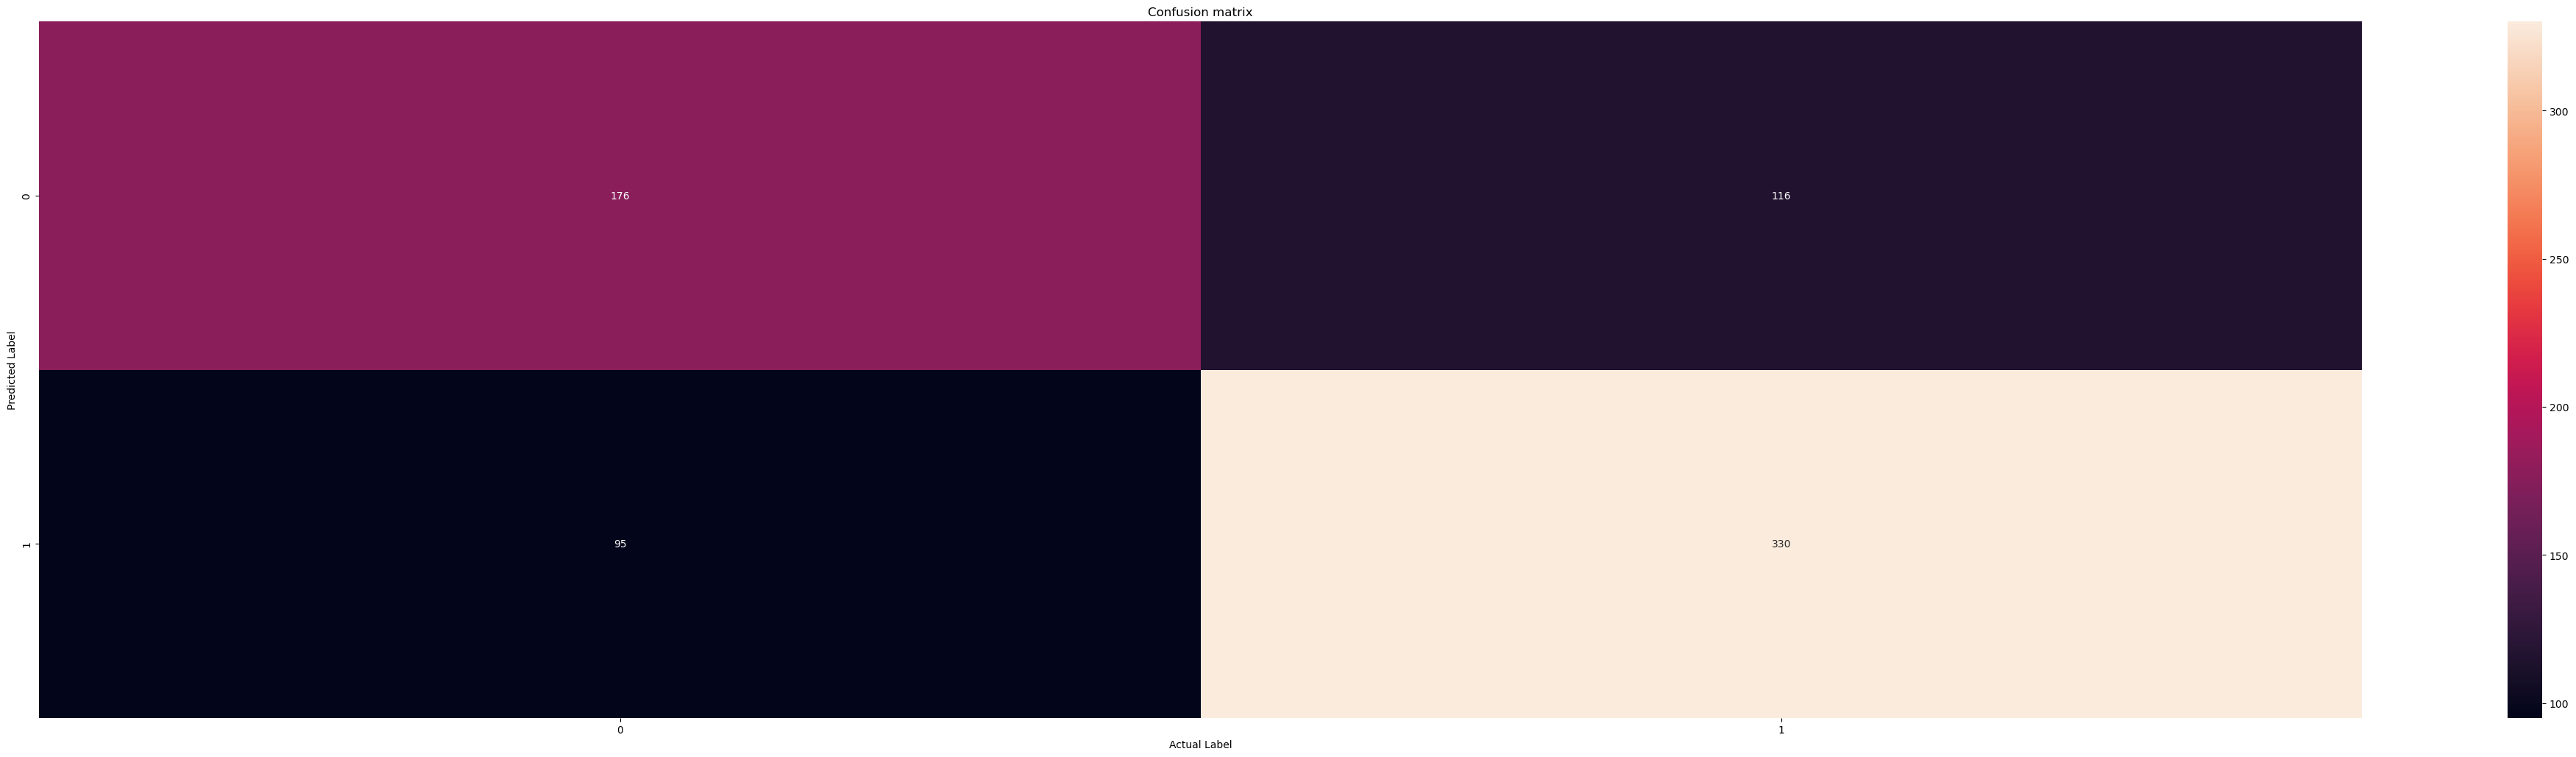

In [26]:
#Decision Tree using Gini Criterion Parameter
max_depth = 15
criterion = 'gini'
dt_model_params = tree.DecisionTreeClassifier(max_depth = max_depth, criterion = criterion)
dt_model_params.fit(X_train, y_train)
dt_model_predictions = dt_model_params.predict(X_test)
print(classification_report(y_test,dt_model_predictions))

#Defining confusion matrix using metrics
cnf_matrix_dt = metrics.confusion_matrix(y_test, dt_model_predictions)
cnf_matrix_dt

#Confusion Matrix Plotting
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Heatmap Creation
sns.heatmap(pd.DataFrame(cnf_matrix_dt), annot=True ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

#Accuracy and Tree detials from Decsion Tree model
print('Tree Depth: ', dt_model_params.get_depth())
print('Number of Leaf Nodes: ', dt_model_params.get_n_leaves())
print('Training Set Accuracy: ', round(dt_model_params.score(X_train, y_train) * 100, 2))
print('Test Set Accuracy: ', round(dt_model_params.score(X_test, y_test)*100, 2))

#Accuracy from metrics report
print("Accuracy:",round(metrics.accuracy_score(y_test, dt_model_predictions)*100,2)) 
print("Precision:",round(metrics.precision_score(y_test, dt_model_predictions)*100,2))
print("Recall:",round(metrics.recall_score(y_test, dt_model_predictions)*100,2))

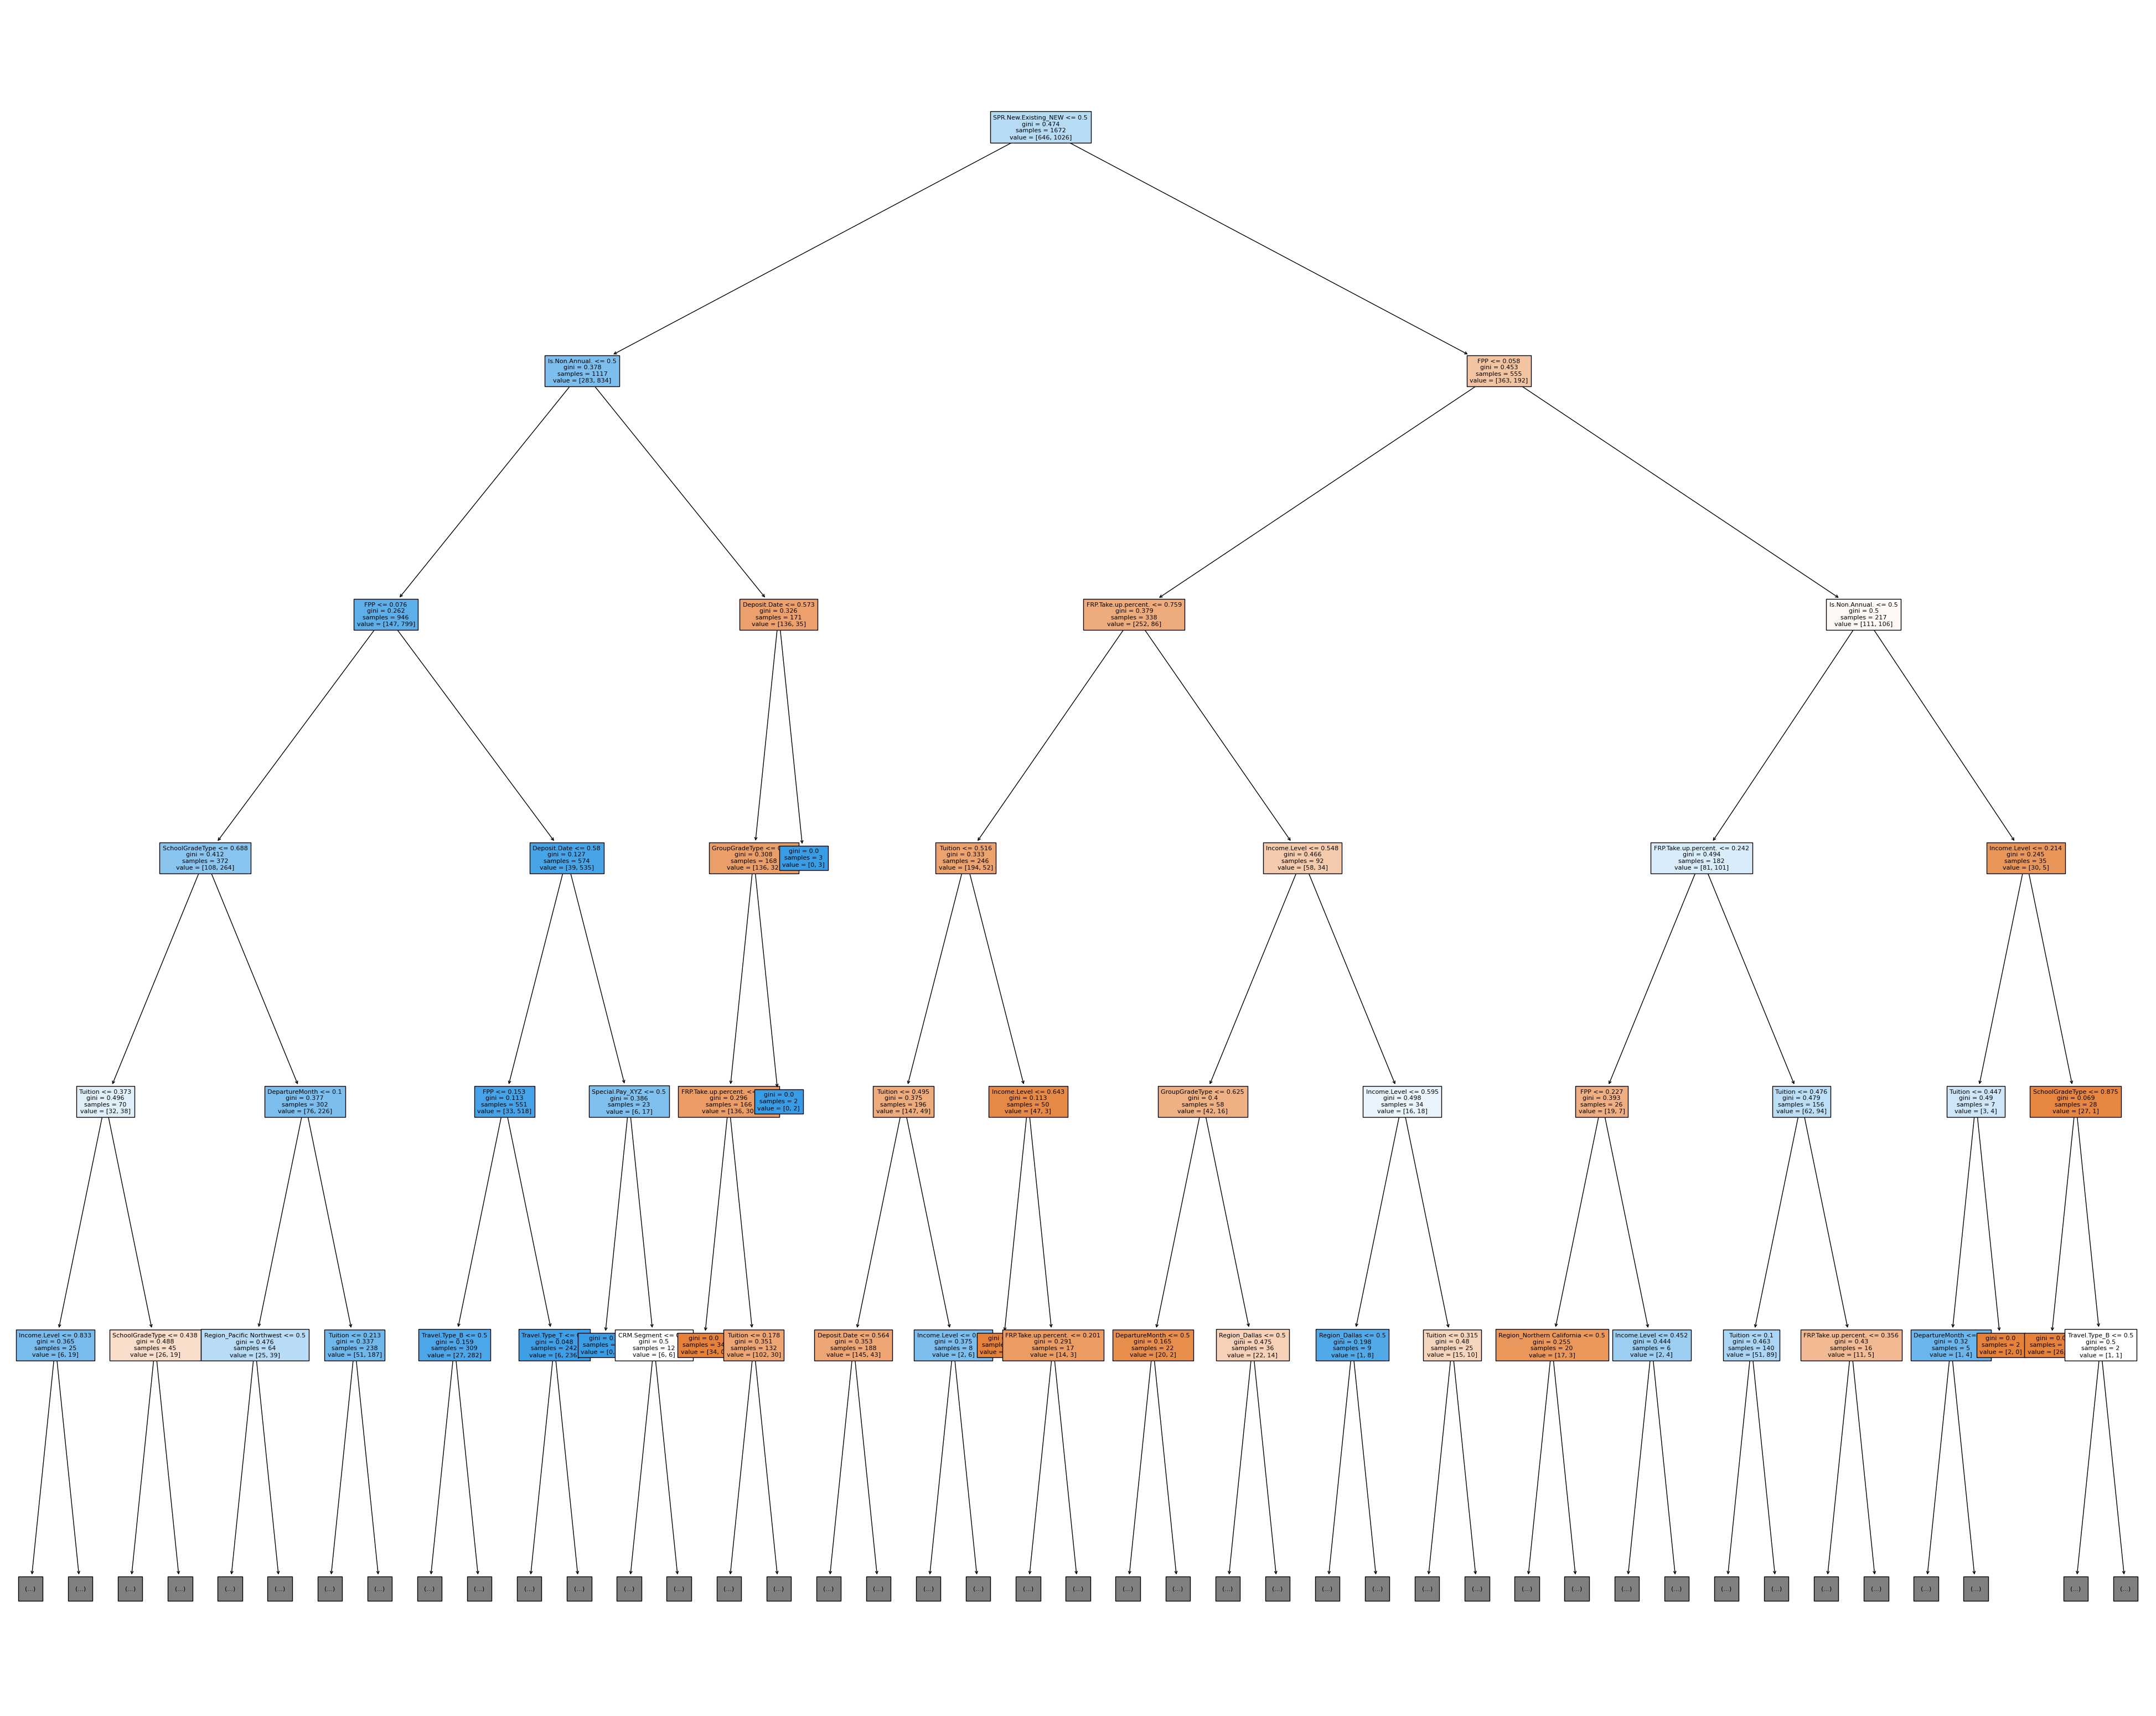

In [27]:
#Decision Tree Graph
plt.figure(figsize=(50,40))
tree_plot = tree.plot_tree(dt_model_params, fontsize = 8, feature_names = X_train.columns, filled = True, max_depth = 5)
plt.show()

              precision    recall  f1-score   support

           0       0.67      0.52      0.59       292
           1       0.72      0.82      0.76       425

    accuracy                           0.70       717
   macro avg       0.69      0.67      0.68       717
weighted avg       0.70      0.70      0.69       717

Training Set Accuracy:  98.56
Test Set Accuracy:  79.92
Accuracy: 79.92
Precision: 80.74
Recall: 86.82


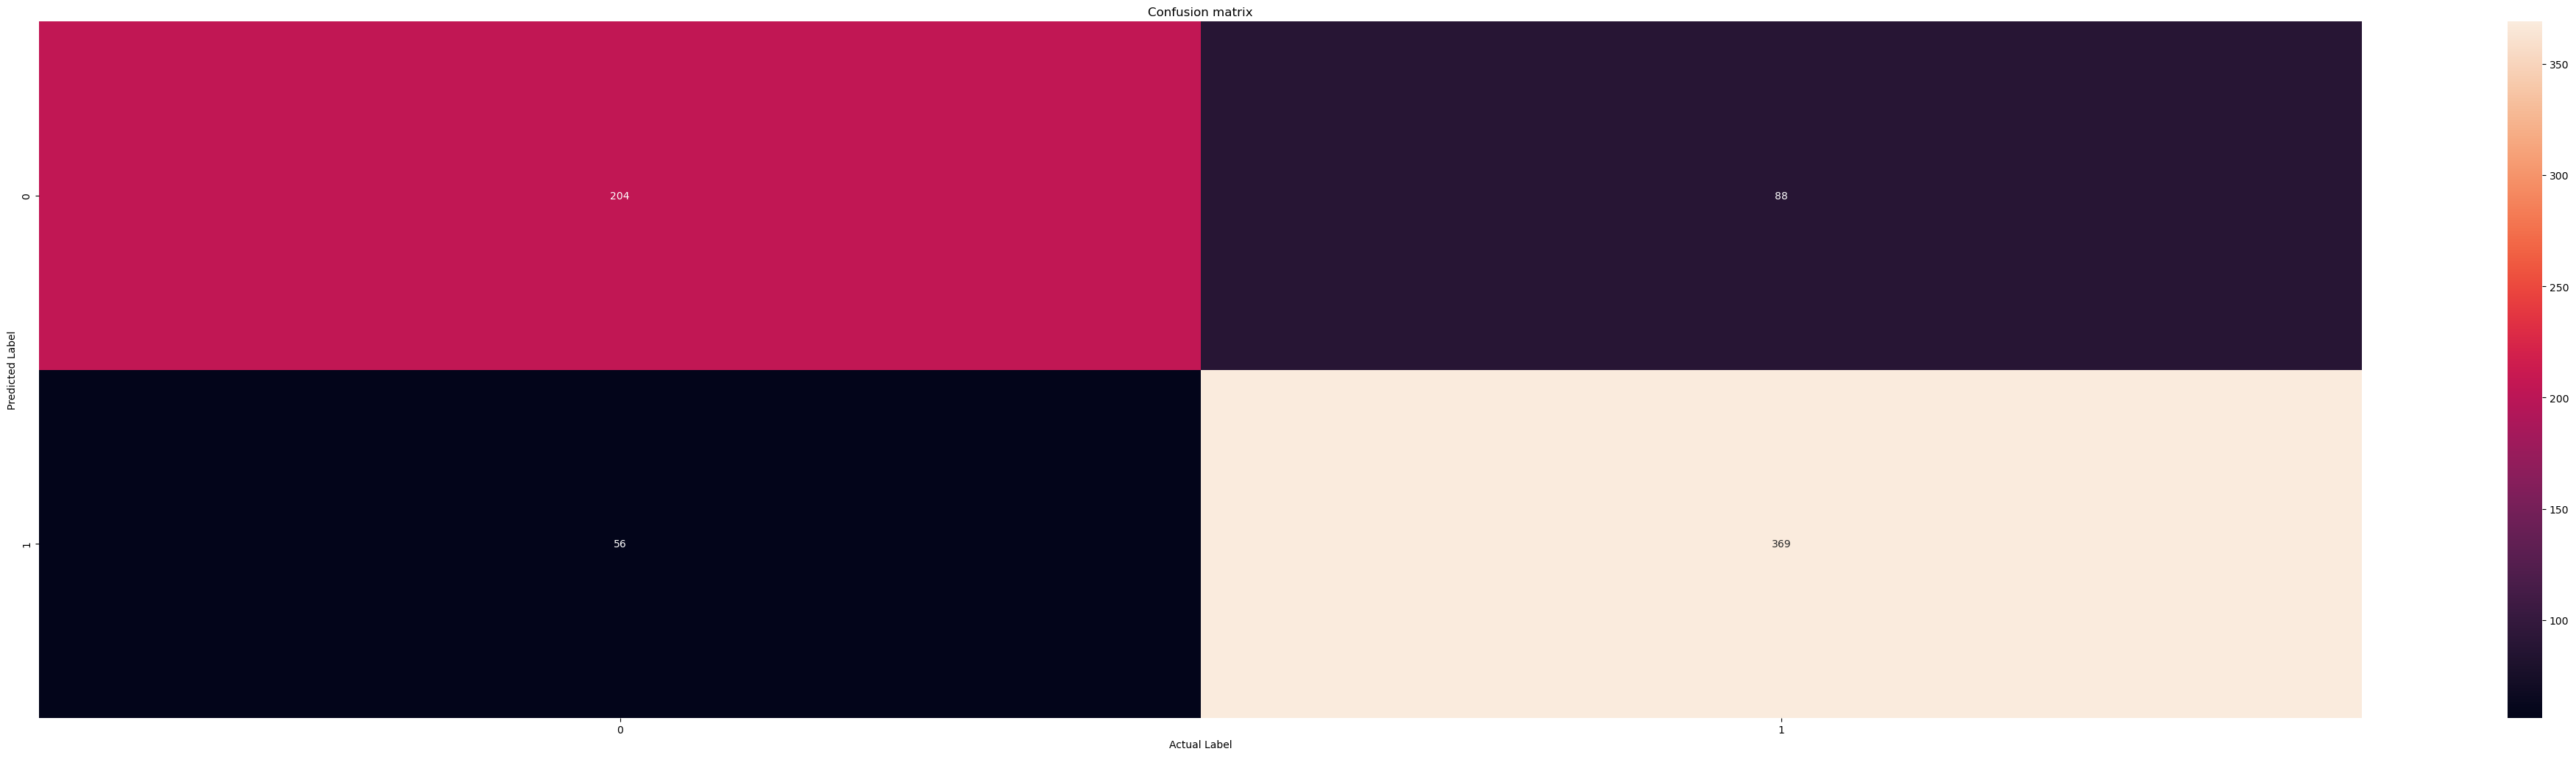

In [28]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
max_depth = 15
criterion = 'gini'
n_estimators = 200
dt_model_rf = RandomForestClassifier(max_depth = max_depth, criterion = criterion, n_estimators = n_estimators)
dt_model_rf.fit(X_train, y_train)
dt_model_rf_predictions = dt_model_rf.predict(X_test)
print(classification_report(y_test,y_pred))

#Defining confusion matrix using metrics
cnf_matrix_rf= metrics.confusion_matrix(y_test, dt_model_rf_predictions)
cnf_matrix_rf

#Confusion Matrix plotting
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#Heatmap Creation
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')

#Accuracy results from RandomForest
print('Training Set Accuracy: ', round(dt_model_rf.score(X_train, y_train) * 100, 2))
print('Test Set Accuracy: ', round(dt_model_rf.score(X_test, y_test)*100, 2))

#Accuracy results form metroics report
print("Accuracy:",round(metrics.accuracy_score(y_test, dt_model_rf_predictions)*100,2)) 
print("Precision:",round(metrics.precision_score(y_test, dt_model_rf_predictions)*100,2))
print("Recall:",round(metrics.recall_score(y_test, dt_model_rf_predictions)*100,2))

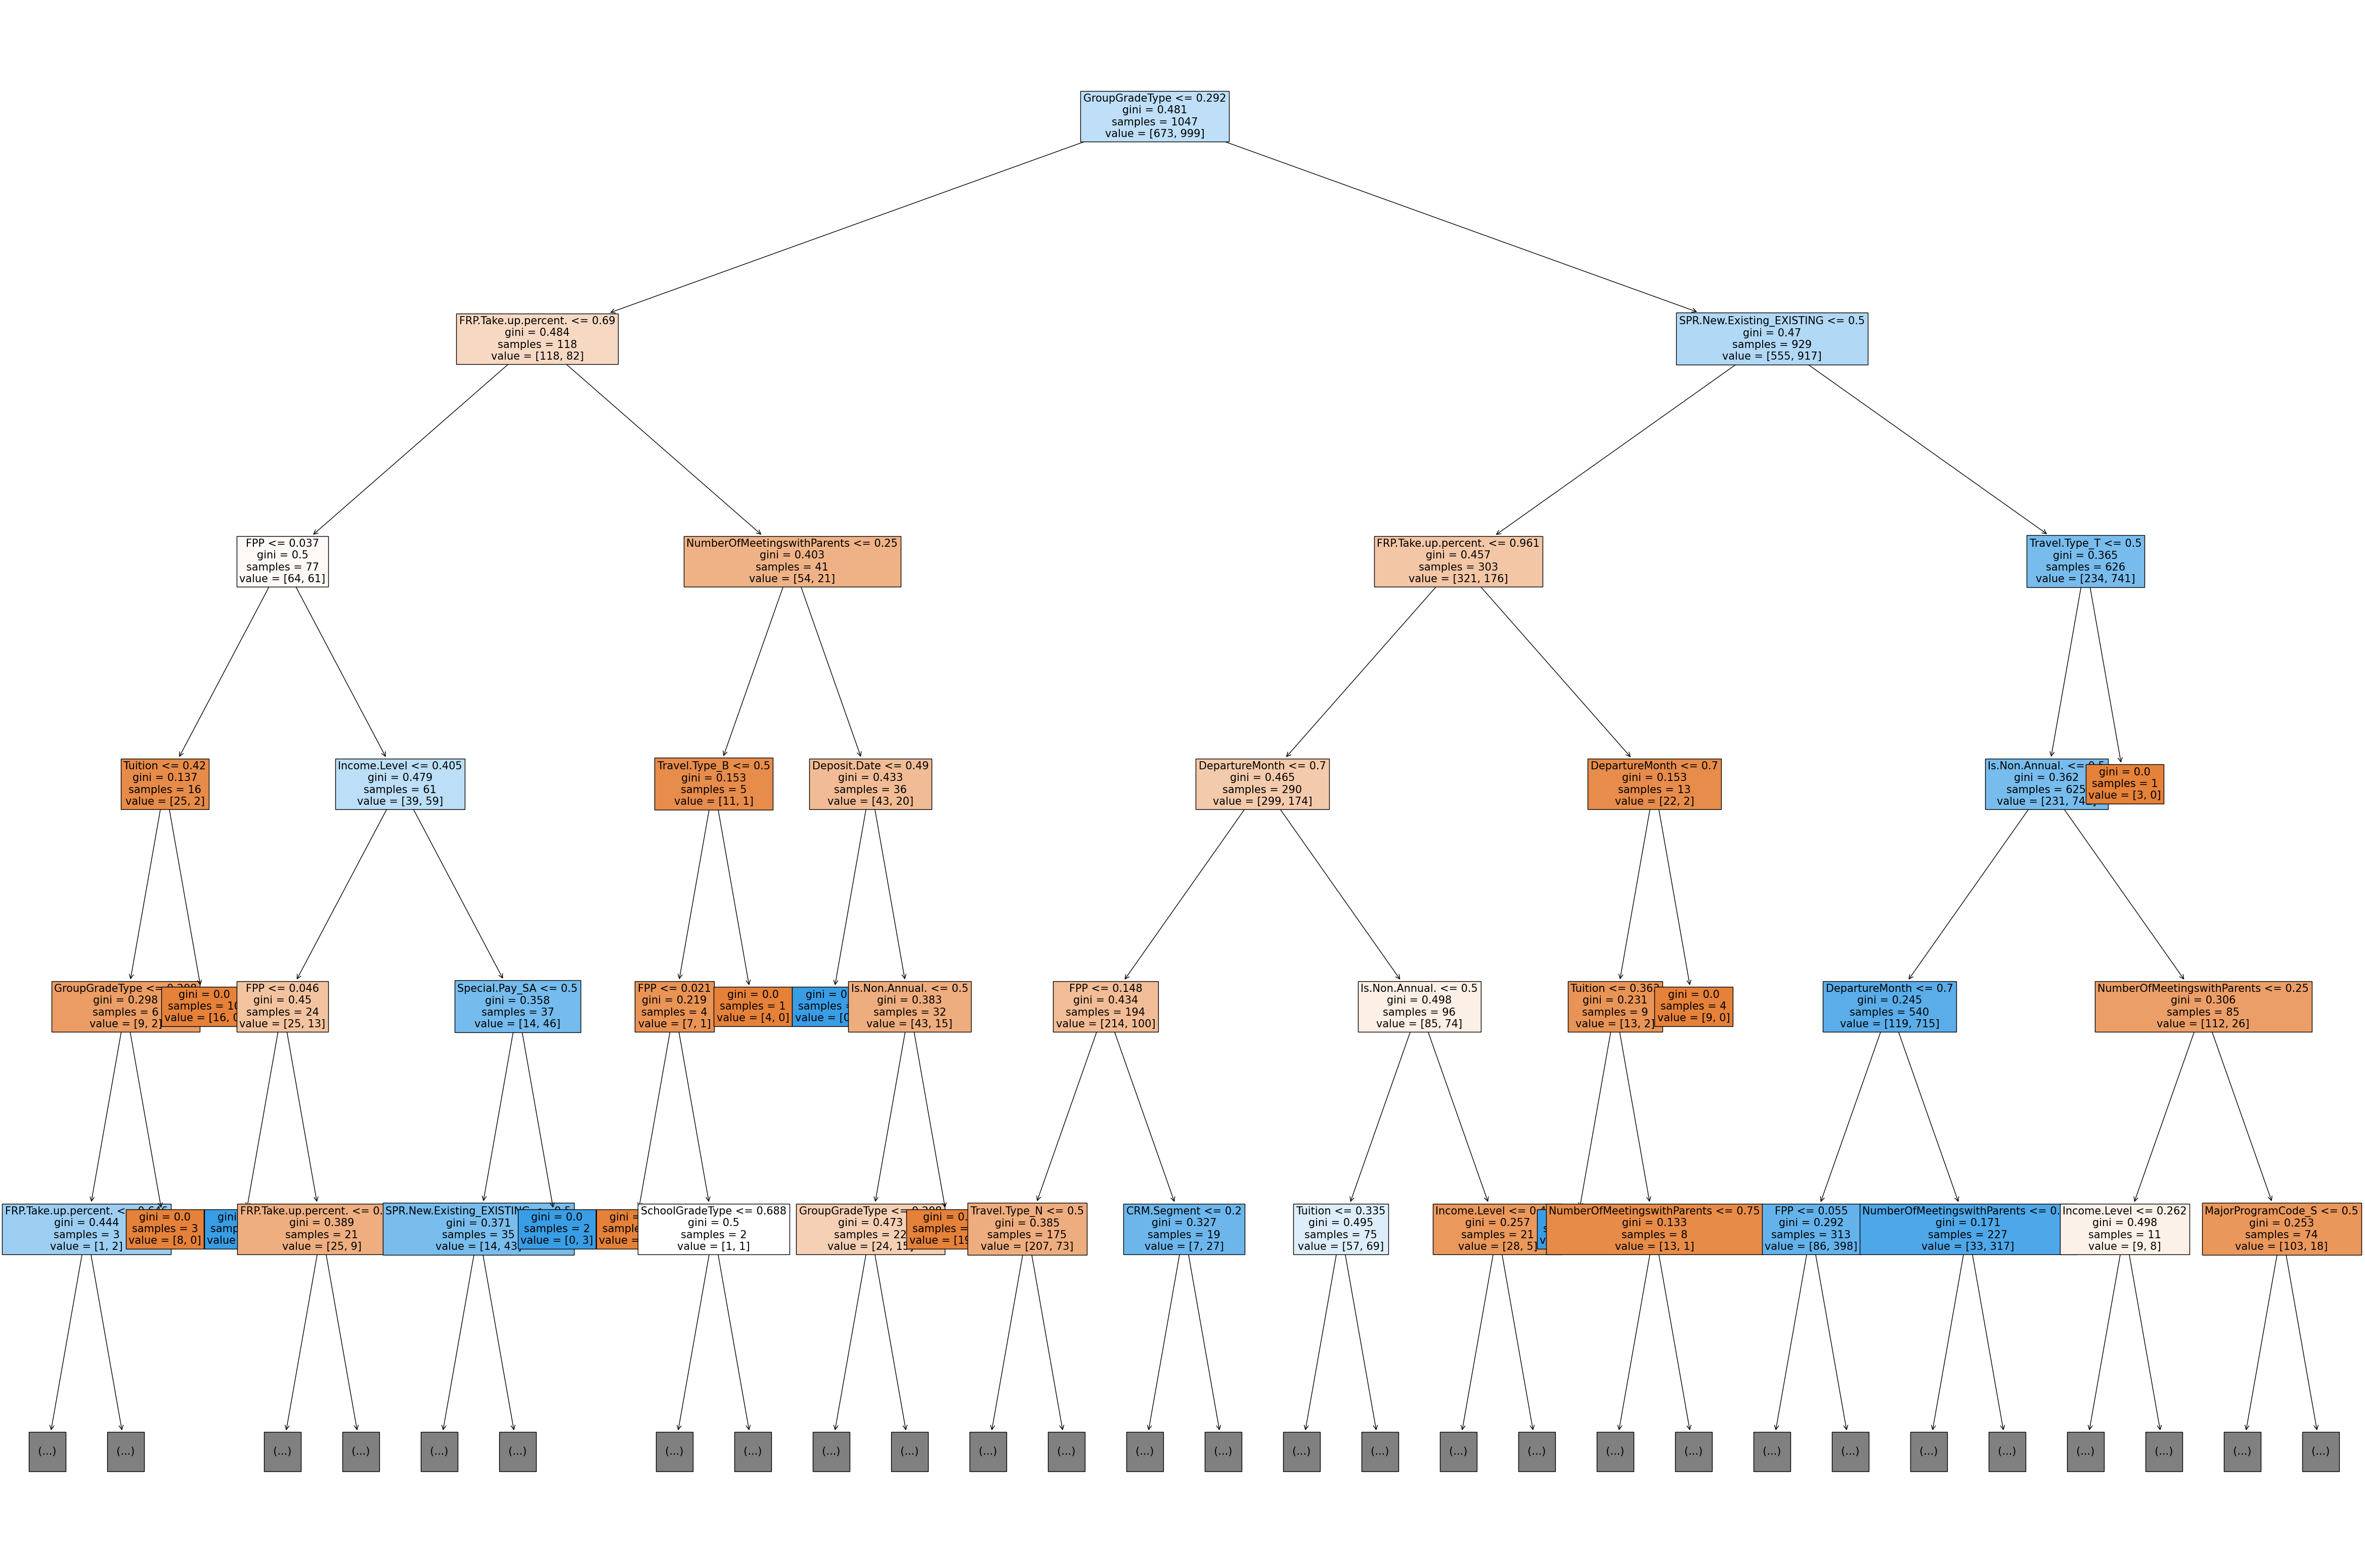

In [29]:
#Random forest Tree Graph

plt.figure(figsize=(60,40))
tree.plot_tree(dt_model_rf[5], max_depth=5, fontsize = 15, feature_names = X_train.columns,filled = True)
plt.show()


Since Ramdom Forest generator seems to have given a better accuracy than all the other model that we have used for predicitng with the test and trained data we will proceed the main scaled data with Random forest function and predict the customer for 2013-14 school year.

<function matplotlib.pyplot.show(close=None, block=None)>

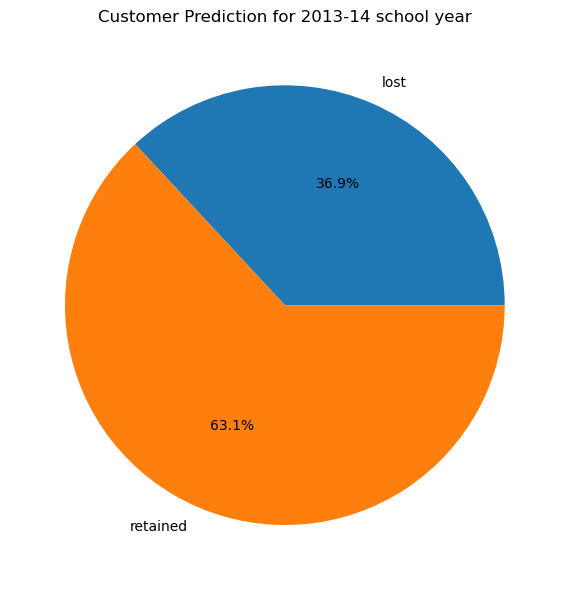

In [30]:
y_pred = dt_model_rf.predict(Scaled_FinalData)
Scaled_FinalData['Customer.Predictions.2013'] = y_pred

#Saving the predictions into a CSV file.
Scaled_FinalData['Customer.Predictions.2013'].to_csv("2013-14_School_Year_Customer_Predictions.csv")

dtTemp = Scaled_FinalData[['Customer.Predictions.2013']]
dtTemp = dtTemp.groupby('Customer.Predictions.2013')['Customer.Predictions.2013'].agg(['count'])

labels = ['lost','retained']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(dtTemp['count'], labels=labels, autopct='%.1f%%')
ax.set_title('Customer Prediction for 2013-14 school year')
plt.tight_layout()
plt.show


,count
Customer.Predictions.2013,
0,882
1,1507


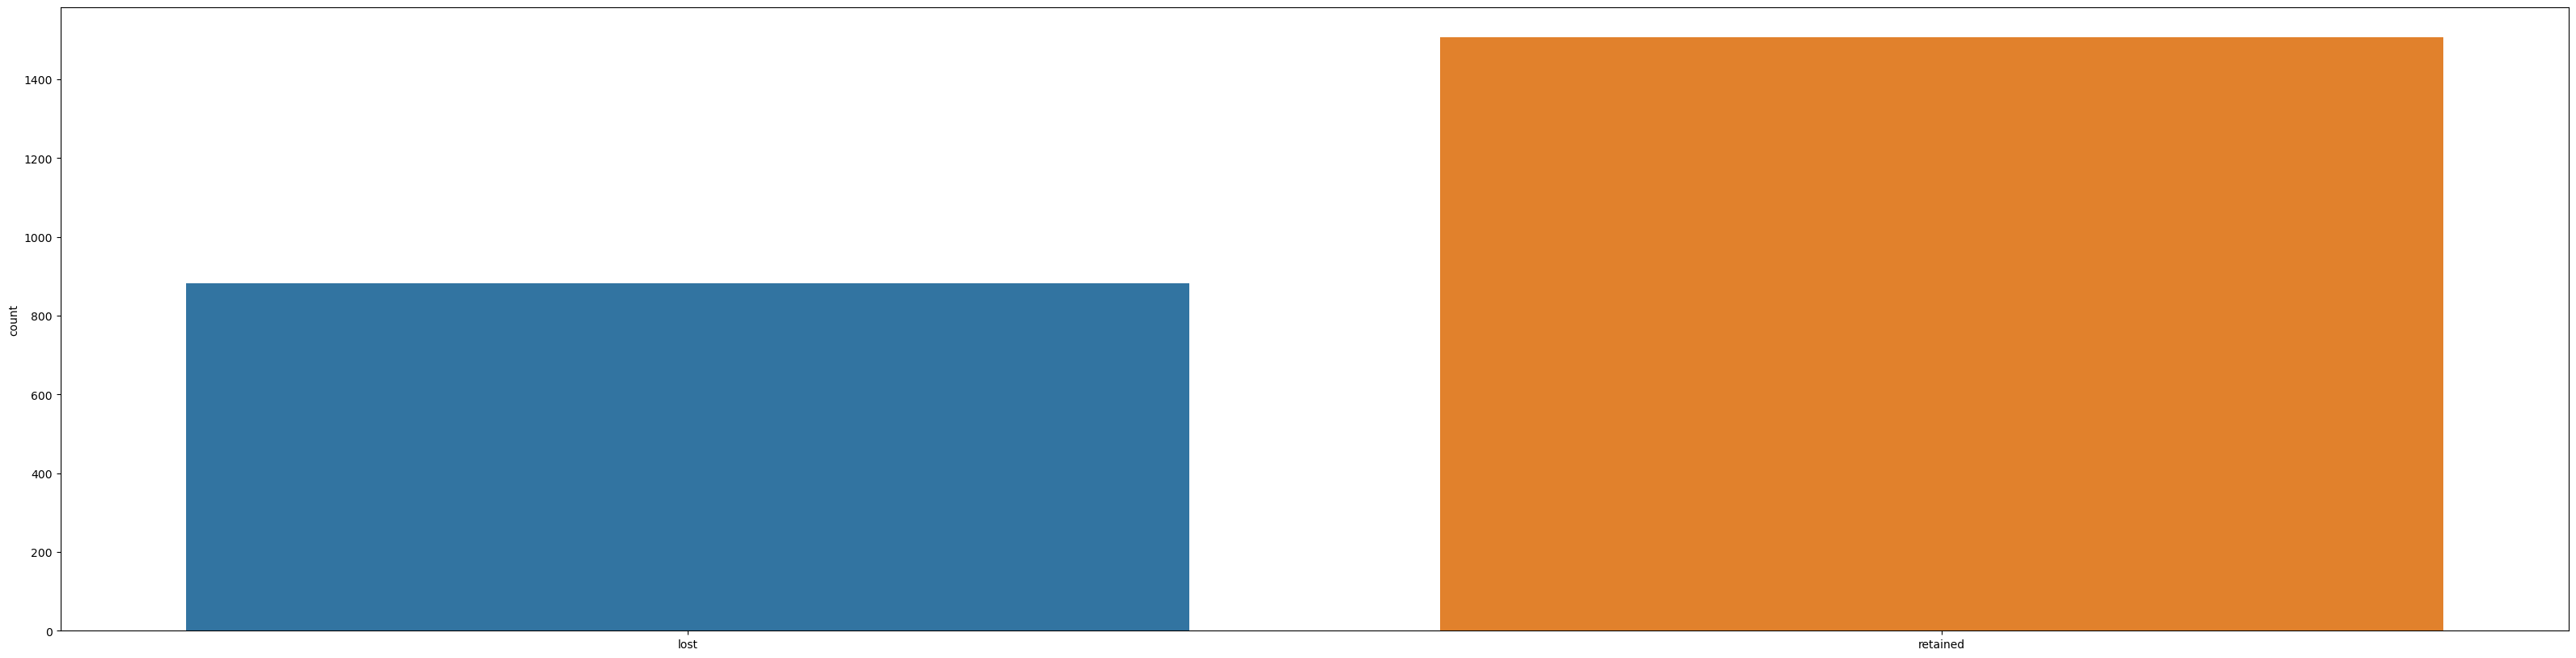

In [38]:
sns.barplot(x=['lost','retained'], y='count', data=dtTemp)
dtTemp

In [ ]:
#Therefore, we infer that the number of persons to be retained is estimated to be approximately 1507 with 63.1%